In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('white')
%config InlineBackend.figure_format='retina'
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import scipy
import math
from itertools import repeat
import scipy.io as sio
from Bio import Phylo
from io import StringIO 


# Targets + general

In [2]:
all_table = pd.read_csv('data/final_table.csv', index_col=0)

targets = ['BDH2', 'TPS1', 'OM14', 'GLK1', 'HSP30', 'STP4', 'YDL124W', 'TPS2',
       'GIS1', 'CCW22', 'HXT7', 'EMI2', 'GRH1', 'GLC3', 'RGI1', 'DOT6', 'SPI1',
       'BMH1', 'HSP12', 'GSY1', 'HXK1', 'PNC1', 'STF2', 'CTT1', 'MGA1',
       'AIM17', 'RTC3', 'PAL2', 'UBX6', 'PEX2', 'UGP1', 'MCR1', 'NNR2', 'GSY2',
       'TMA10', 'TSL1', 'ISF1', 'PGM2', 'ICY1', 'TDA1', 'RAS2', 'ZWF1', 'GAC1',
       'TPO4', 'CIP1', 'HST2', 'USV1', 'NCE102', 'GPH1', 'DDR2', 'HOR7',
       'YBR085C-A', 'MEO1', 'COQ21', 'COX26']

wt_tergets_all = ['BDH2', 'HSP26', 'TPS1', 'OM14', 'GLK1', 'HSP30', 'SIT4', 'STP4',
       'MRK1', 'YDL124W', 'HNT1', 'SNF11', 'TPS2', 'GIS1', 'YDR133C', 'CCW22',
       'ADR1', 'VHS1', 'HXT7', 'EMI2', 'GRH1', 'GLC3', 'GIP2', 'RGI1', 'DOT6',
       'SPI1', 'BMH1', 'HSP12', 'MDJ1', 'GSY1', 'HXK1', 'MIG1', 'YGL036W',
       'PNC1', 'STF2', 'CTT1', 'RTS3', 'MGA1', 'AIM17', 'RIM4', 'RTC3', 'PAL2',
       'UBX6', 'PEX2', 'OPT1', 'UGP1', 'HAP4', 'KTI12', 'MCR1', 'NNR2', 'GSY2',
       'TMA10', 'TSL1', 'CUE4', 'ISF1', 'PGM2', 'ICY1', 'HAS1', 'TDA1', 'RAS2',
       'YNL144C', 'YNL193W', 'YNL194C', 'ZWF1', 'GAC1', 'TPO4', 'CIP1', 'HST2',
       'SUR1', 'USV1', 'NCE102', 'GPH1', 'DDR2', 'HOR7', 'SNA2', 'YMR194C-A',
       'EGO4', 'YPR160W-A', 'YBR085C-A', 'MEO1', 'YBR126W-B', 'COQ21', 'COX26',
       'YDR524C-A', 'YFR052C-A', 'YGR161W-C']
med_targets = ['VPS36','GLN1','TYE7','YGR146C-A','TPI1','HHF2','CIT2','VHR1','LEE1',
               'BAP2','DIP5','ALD6','APJ1','PLB1',
 'YLR257W','HHT2','HSP150','FBA1','BAP3','TDH1','ENO2','CTR2','SPO24','ENO1','GPP1','MOD5','MMO1','YNL097W-A','SED1','PDR5','YIL055C','TDH3','YLR415C',
 'PGK1','ADP1','GSC2','IPT1','RGI2','CMC4','LGE1','JEN1','IXR1','GDH1','HEM12']

common_msnmed = ['CIP1','SUR1','YBR126W-B','RGI1','ICY1','HXT7','UGP1','GAC1','STP4','GLC3','HSP12','YFR052C-A','YDL124W','SNF11',
 'TPO4','BDH2','YPR160W-A','TPS1','MIG1','PAL2','ADR1','PNC1','TSL1','MEO1','GSY2','GPH1','TPS2','YDR133C','CCW22','VHS1','YBR085C-A',
 'YGR161W-C','MRK1','MDJ1','GSY1','PGM2','GIS1','YMR194C-A','HSP26','DDR2','HOR7','ISF1','GIP2','HAP4','SIT4','HNT1','USV1','HXK1','CUE4',
 'EGO4','RAS2','TMA10','RTC3','YNL144C','RTS3','YGL036W','ZWF1','HST2','GLK1']

unique_msn = ['HAS1','KTI12','MGA1', 'BMH1','NCE102','MCR1', 'NNR2', 'YNL194C','AIM17','YNL193W','COX26','COQ21','HSP30',
 'EMI2','GRH1','UBX6','OM14','DOT6','YDR524C-A','STF2','SPI1','OPT1','SNA2','RIM4','TDA1','PEX2','CTT1']



gp = sio.loadmat('data/general_params_110120.mat')
msn2_paddle = np.load('data/ms2_paddle.npy')
exp_data_paddle = pd.read_csv('data/paddle_experimental_ads.csv', index_col=0)
exp_data_paddle.columns = [name.replace(' ', '_') for name in exp_data_paddle.columns]
dis = pd.read_csv('data/MSN2WT_iupred_long.dis', delimiter='\t', header=None, index_col=0)
aro80 = pd.read_csv('data/basic_info.csv', index_col=1).aro80Sig.dropna().drop(['FWY_random2', 'LIV_random2', 'LIV_random3'])


# Expression

In [221]:
exp = pd.read_csv('data/20221120_rna_combined_repeats.csv',index_col=0)
nexp = (2**exp)-1
sp_og = pd.read_csv('data/20230521_sumrpom_wdmsn4.csv', index_col=0)

induce = sp_og.iloc[gp['esr_gasch_induce'].T[0]-1].index.drop('[]')
reduce = sp_og.iloc[gp['esr_gasch_reduce'].T[0]-1].index.drop('[]')

exp.columns = [name.split('.')[0] for name in exp.columns]
average = exp.transpose().reset_index().groupby('index').median().transpose().rename_axis(None, axis='columns').rename({'G_P deletion':'G_P_deletion'}, axis=1)
sem = exp.transpose().reset_index().groupby('index').sem().transpose().rename_axis(None, axis='columns').rename({'G_P deletion':'G_P_deletion'}, axis=1)
norm_reduce= average.loc[reduce,:].median(axis=0)/average.loc[reduce,:].median(axis=0).median()
average = average.multiply(norm_reduce)
sem = sem.multiply(norm_reduce)

norm_reduce = nexp.loc[reduce,:].median(axis=0)/nexp.loc[reduce,:].median(axis=0).median()
nexp =  nexp.multiply(norm_reduce)
nexp.columns = [name.split('.')[0] for name in nexp.columns]
naverage = nexp.transpose().reset_index().groupby('index').median().transpose().rename_axis(None, axis='columns').rename({'G_P deletion':'G_P_deletion'}, axis=1)

e = (naverage.loc[targets]).median()
# allfc_e = e - e.loc['dMsn2']
# e_model = (allfc_e/maxfc_e)


e_repeats= (nexp.loc[targets]).median()

# linear median before subtraction
allfcs_e_repeats = e_repeats - e.loc['dMsn2']
maxfc_e = (e.loc['Msn2'] - e.loc['dMsn2'])
## linear median after subtraction
# allfcs_e_repeats = nexp.loc[targets].sub(naverage.loc[targets, 'dMsn2'], axis=0).median()
# maxfc_e = naverage.loc[targets, 'Msn2'].sub(naverage.loc[targets, 'dMsn2'], axis=0).median()

## linear after log2 subtaction
# allfcs_e_repeats = (2**(exp.loc[targets].sub(average.loc[targets, 'dMsn2'], axis=0)-1).median())
# maxfc_e = (2**(exp.loc[targets, 'Msn2'].sub(average.loc[targets, 'dMsn2'], axis=0)-1).median().mean())

e_model_repeats = (allfcs_e_repeats/maxfc_e)
e_model_sem = e_model_repeats.reset_index().groupby('index').sem().fillna(0)
e_model_mean = e_model_repeats.reset_index().groupby('index').mean().fillna(0)
e_model_mean.loc['Msn2'] = 1
e_model_mean.loc['dMsn2'] = 0

# Binding + Fig. S1

24.792840457901082 -0.5661986168920295


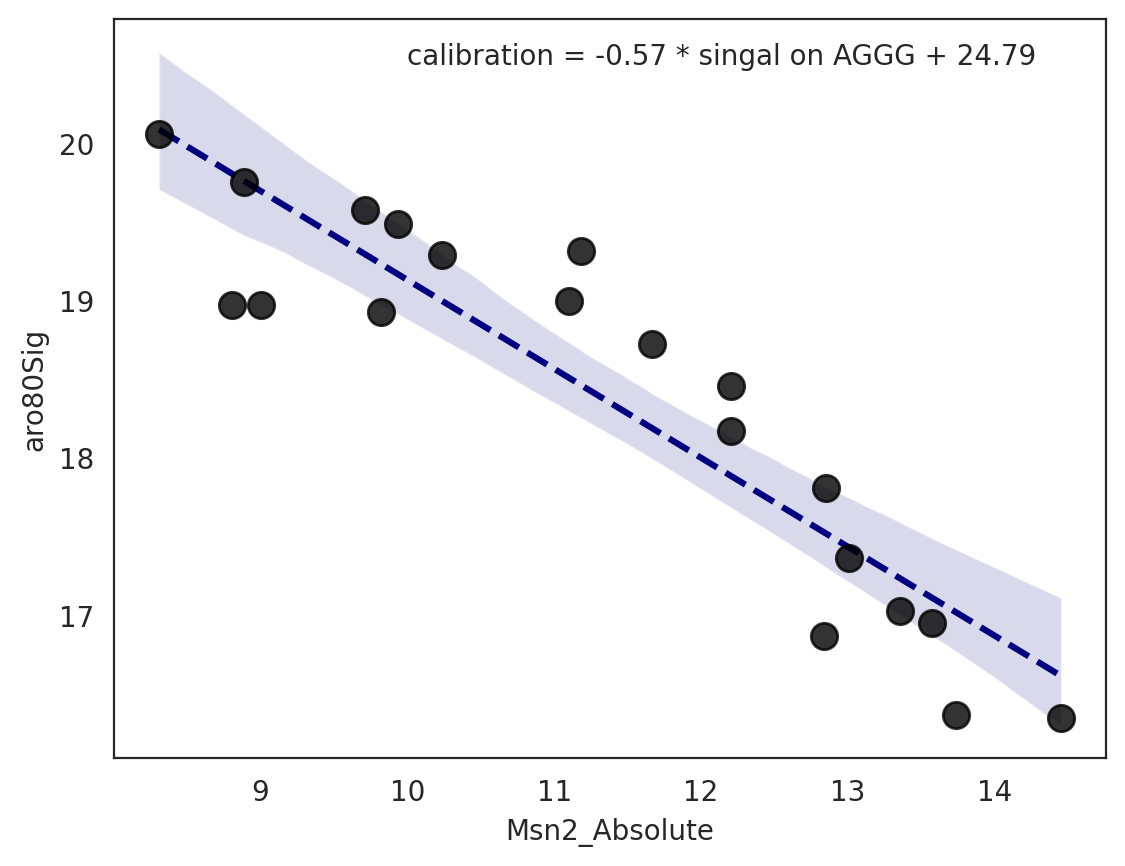

In [426]:
sp_repeats = pd.read_parquet('data/repeats_sp_20230723.parquet.gzip')
sp_repeats.columns = ['_'.join(name.split('_')[:-1]) for name in sp_repeats.columns]
sp_og.loc[:, 'LIVFWY_deletion'] = sp_repeats.loc[:, 'LIVFWY_deletion'].mean(axis=1)
msn2t = list(sp_og.loc[common_msnmed+unique_msn, 'Msn2'].sort_values(ascending=False).index)

abs_repeats = pd.read_csv('data/calculatednonmed_log2abs.csv', index_col=0)
abs_repeats.index = ['_'.join(name.split('_')[:-1]) for name in abs_repeats.index]



signal = all_table.loc[aro80.index]
fig, ax = plt.subplots(1)
p = sns.regplot(x=signal.Msn2_Absolute, y=np.log2(aro80), scatter_kws={'color':'k', 'edgecolors':'k', 's':90, 'zorder':20},
                line_kws={'linestyle':'--', 'color':'navy'})
slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())
print(intercept, slope)
ax.text(10,20.5, "calibration = {} * singal on AGGG + {}".format(np.round(slope,2), np.round(intercept,2)))


all_table = all_table.rename({'LIVFWY_deletion_all1':'LIVFWY_deletion'})

all_table.loc[:, 'ARO80_from_regression'] = all_table.Msn2_Absolute.apply(lambda x : x*slope + intercept).rename({'LIVFWY_deletion_all1':'LIVFWY_deletion'})

all_table.loc[:, 'log2_Paddle_pred_sum'] = np.log2(all_table.Paddle_pred_sum)
sp = sp_og.loc[:, list(all_table.drop(['Msn2_150_450_dMsn4', 'Msn2_150_550_dMsn4', 'Msn2_250_550_dMsn4', 'Msn2_250_642_dMsn4', 'Msn2_Zfonly_dMsn4', 'Msn2_dMotB_dMsn4', 'LIVFWY_deletion_all2']).index)].div(2**all_table.ARO80_from_regression)


msn4 = ['Msn2_135_dMsn4', 'Msn2_150_350_dMsn4', 'Msn2_150_450_dMsn4', 'Msn2_150_550_dMsn4', 'Msn2_200_dMsn4',
'Msn2_250_450_dMsn4', 'Msn2_250_550_dMsn4', 'Msn2_250_642_dMsn4', 'Msn2_320_dMsn4', 'Msn2_350_550_dMsn4', 'Msn2_370_dMsn4',
'Msn2_420_dMsn4', 'Msn2_450_642_dMsn4', 'Msn2_470_dMsn4', 'Msn2_520_dMsn4', 'Msn2_570_dMsn4',
'Msn2_604_dMsn4', 'Msn2_Zfonly_dMsn4', 'Msn2_dMotA_dMsn4', 'Msn2_dMotB_dMsn4', 'Msn2_dTAD_dMsn4']




b_repeats = sp_repeats.loc[targets, :].median() - (2 ** abs_repeats.apply(lambda x : x*slope + intercept)).squeeze().values
maxfc_f = (b_repeats.loc['MSN2WT'].mean() - b_repeats.loc['MSN2_start_nls'].mean())
maxfc_s = (b_repeats.loc['Msn2'].mean() - b_repeats.loc['MSN2_start_nls'].mean())
allfcs_repeats = b_repeats - b_repeats.loc['MSN2_start_nls'].mean()

b_model_repeats = (allfcs_repeats/maxfc_f)
b_model_mean = b_model_repeats.reset_index().groupby('index').mean().fillna(0)
b_model_sem = b_model_repeats.reset_index().groupby('index').sem().fillna(0)

b_model_repeats_sag = (allfcs_repeats/maxfc_s)
b_model_repeats_sag = b_model_repeats_sag.rename({'Msn2_ZFonly_dMsn4':'Msn2_dMsn4', 'Msn2_dMsn4':'Msn2_ZFonly_dMsn4'})
b_model_mean_sag = b_model_repeats_sag.reset_index().groupby('index').mean().fillna(0)
b_model_sem_sag = b_model_repeats_sag.reset_index().groupby('index').sem().fillna(0)
fig.savefig('figures/Supp/Fig_supp_aro80_regr.pdf')


# Med15

In [223]:
med_repeats = pd.read_csv('data/med15repeats_20230721.csv', index_col=0).rename({'start_nls':'MSN2_start_nls'}, axis=1)
med_repeats.columns = [name.split('.')[0] for name in med_repeats.columns]
med = med_repeats.transpose().reset_index().groupby('index').mean().transpose().rename_axis(None, axis='columns').rename({'start_nls':'MSN2_start_nls'}, axis=1)
medt = list(med.loc[med_targets, 'Msn2'].sort_values(ascending=False).index)

offir_dat = pd.read_csv('data/offie_med_dat.csv', index_col=0)
ddmed15 = offir_dat.loc[targets, 'Gal11_ddmsn'].sum() / offir_dat.loc[medt+msn2t,'Gal11_ddmsn'].sum()
med15wt = med.loc[:,'Msn2'].loc[targets].sum() / med.loc[:,'Msn2'].loc[medt+msn2t].sum()

med_norm1 = lambda x : x.loc[targets].sum() / x.loc[medt+msn2t].sum()

maxfc =  med_norm1(med.loc[:,'Msn2']) - ddmed15
fc_repeats = med_norm1(med_repeats) - ddmed15
res_repeats = fc_repeats.div(maxfc, axis=0).drop('Msn2_ddMotAMotB')
m_model_sem = res_repeats.reset_index().groupby('index').sem().fillna(0)
m_model_mean = res_repeats.reset_index().groupby('index').mean().fillna(0)

# Figure1

## Fig1A 

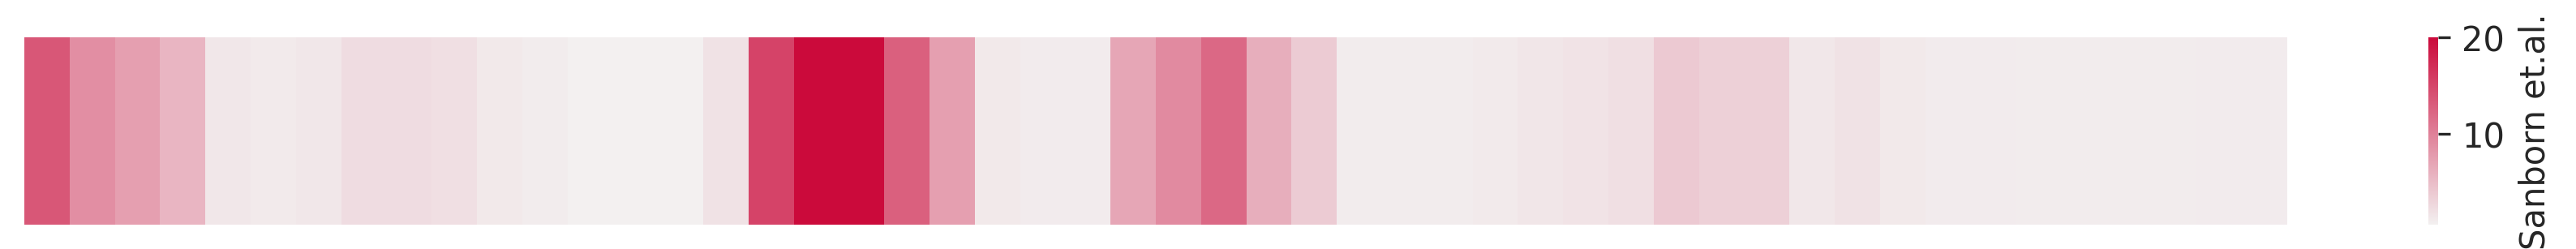

In [225]:
fig, axes = plt.subplots(1, figsize=(15,1), dpi=150)
salmon_map = sns.color_palette("light:#cb0a3b", as_cmap=True)
ax = axes
dat = exp_data_paddle.query("protein=='MSN2'").sort_values(by='position').drop('A_controls-mean_MSN2').activation.fillna(0).values

sns.heatmap(pd.DataFrame(dat).transpose().rolling(window=3,center=True, axis=1).mean().dropna(axis=1),
            cmap=salmon_map, ax=ax, vmax=20, cbar_kws=dict(label='Sanborn et.al.'))

tiles = exp_data_paddle.query("protein=='MSN2'").sort_values(by='position').drop('A_controls-mean_MSN2').position.apply(lambda x:int(x)).values
tiles = tiles[::4]
# ax.set_xticks(np.arange(0,52,4), tiles)
ax.set_xticklabels('')
# for i in np.arange(0,52,4):
#     ax.axvline(i, c='k', linewidth=.5)
ax.set_yticklabels('')
fig.savefig('figures/Main/fig1/sanborn.pdf')

## Fig1C

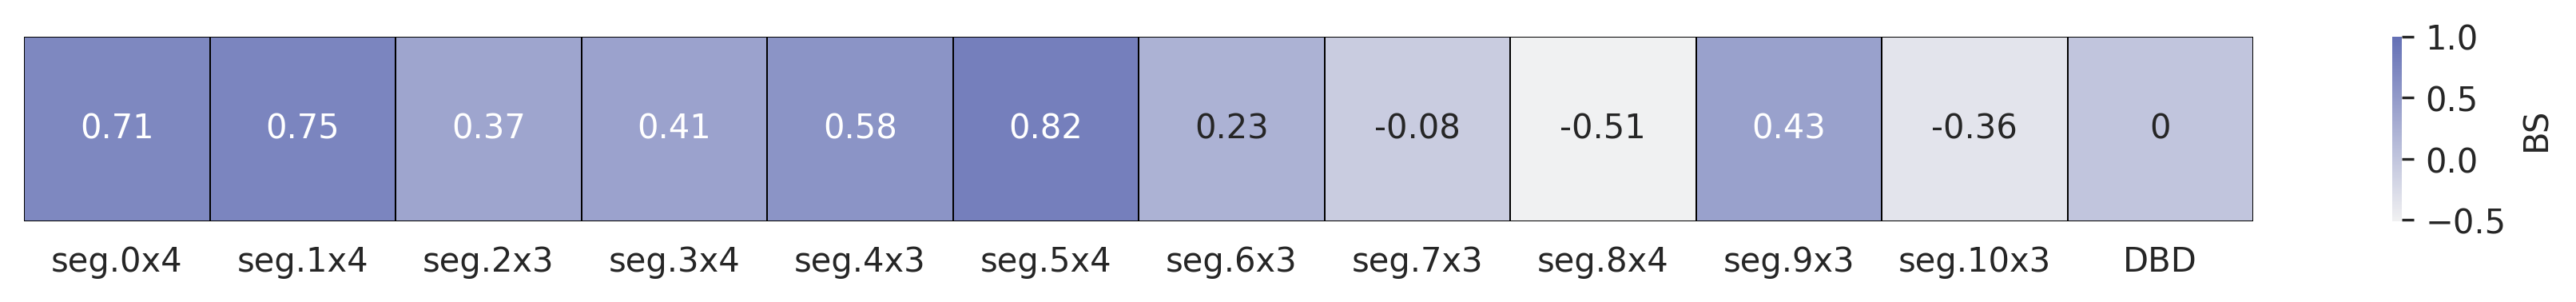

In [226]:
bigr_names = ['rep0x4','rep1x4', 'rep2x3', 'rep3x4', 'rep4x3', 'rep5x4', 'rep6x3', 'rep7x3','rep8x4', 'rep9x3', 'rep10x3',]
bigr_abs_corrected = b_model_mean.filter(regex='Rep|rep', axis=0).filter(regex='x3|x4', axis=0)
bigr_abs_corrected.index = [name.lower() for name in bigr_abs_corrected.index]
bigr_abs_corrected = bigr_abs_corrected.loc[bigr_names]

bigr_abs_corrected.loc['DBD'] = b_model_mean.loc['MSN2_start_nls']

fig, ax = plt.subplots(1, figsize=(15,1),dpi=150)
sns.heatmap(bigr_abs_corrected.transpose(), cmap=sns.color_palette("light:#6470b5", as_cmap=True), linecolor='k', linewidths=.4, annot=True, cbar_kws=dict(label='BS'), vmax=1)
ax.set_xticklabels(bigr_abs_corrected.index.str.replace('rep', 'seg.'))
ax.set_yticklabels('')
fig.savefig('figures/Main/fig1/reps_max_binding.pdf')

## Fig 1B+1F

/tmp/ipykernel_25675/2669563009.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Msn2', 'Msn2DBD', 'Msn2DBD_dMsn4\nprojected'], rotation=90)


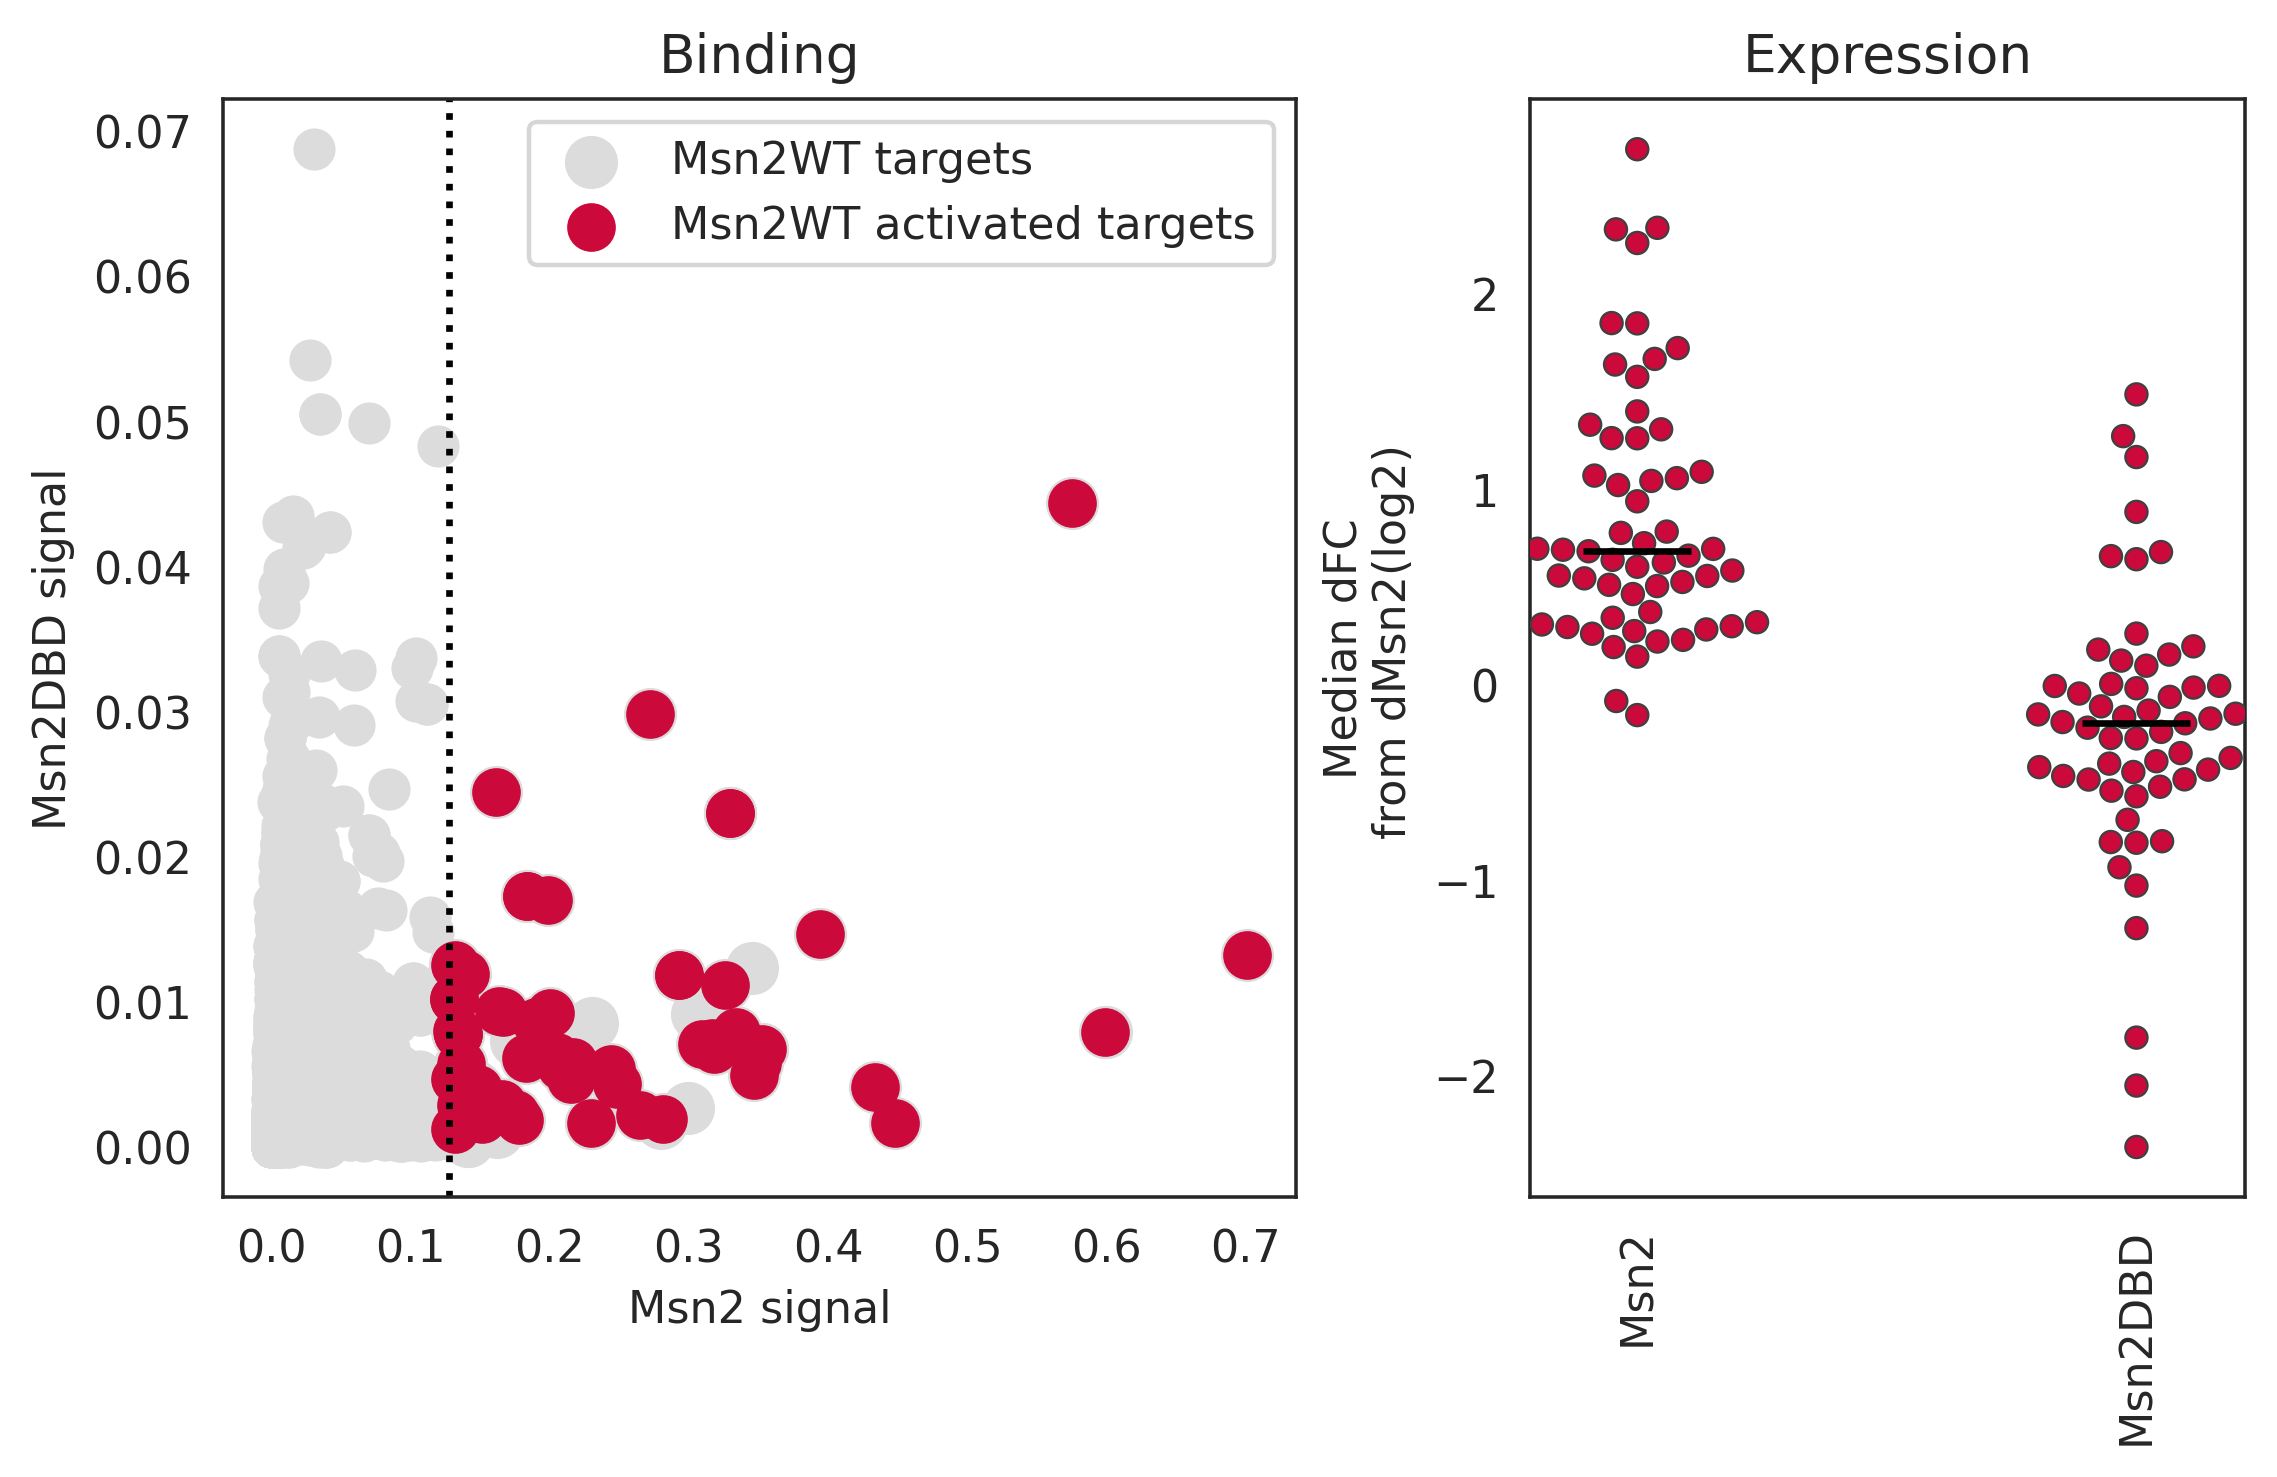

In [227]:
binding_comp = (sp.loc[targets, ['Msn2', 'MSN2_start_nls']]/ all_table.ARO80_from_regression.loc[['Msn2', 'MSN2_start_nls']]).sort_values(by='Msn2', ascending=False)
exp_data = average.loc[targets].sub(average.loc[targets, 'dMsn2'], axis=0).sort_values(by='Msn2', ascending=False)


fig, axes = plt.subplots(1,2, width_ratios=[1.8,1.2], figsize=(7,4.5), constrained_layout=True, dpi=160)
tunion = wt_tergets_all
ax = axes[0]
ax.scatter(sp.Msn2.drop(tunion), sp.MSN2_start_nls.drop(tunion), c='gainsboro', alpha=1, s=90, linewidths=0)
ax.scatter(sp.loc[wt_tergets_all, 'Msn2'], sp.loc[wt_tergets_all, 'MSN2_start_nls'], c='gainsboro', s=120, label='Msn2WT targets', alpha=1)

ax.axvline(sp.loc[wt_tergets_all, 'Msn2'].min(), c='k', linestyle=':')
ax.scatter(sp.loc[targets, 'Msn2'], sp.loc[targets, 'MSN2_start_nls'], facecolor='#cb0a3b', s=120, label='Msn2WT activated targets', linewidths=0)

ax.set_ylabel('Msn2DBD signal')
ax.set_xlabel('Msn2 signal')
ax.set_title('Binding')
ax.legend()

ax=axes[1]
sns.swarmplot(exp_data.loc[binding_comp.index, ['Msn2', 'MSN2_start_nls']].sort_values(by='Msn2', ascending=False), palette=['#cb0a3b', '#cb0a3b'], edgecolors='k', linewidth=.5,)
ax.scatter(x = exp_data.loc[binding_comp.index, ['Msn2', 'MSN2_start_nls', ]].median().index,
          y = exp_data.loc[binding_comp.index, ['Msn2', 'MSN2_start_nls',]].median().values, s=600, zorder=20, marker='_', c='k')

ax.set_ylabel('Median dFC\n from dMsn2(log2)')
ax.set_xticklabels(['Msn2', 'Msn2DBD', 'Msn2DBD_dMsn4\nprojected'], rotation=90)
ax.set_title('Expression')
fig.savefig('figures/Main/fig1/msn2vsdbd.pdf')
plt.show()




## Fig1G (bottom)

/tmp/ipykernel_25675/2433947024.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(rep_table.Info.str.replace('rep', 'seg.'))
/tmp/ipykernel_25675/2433947024.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(rep_table.Info.str.replace('rep', 'seg.'))


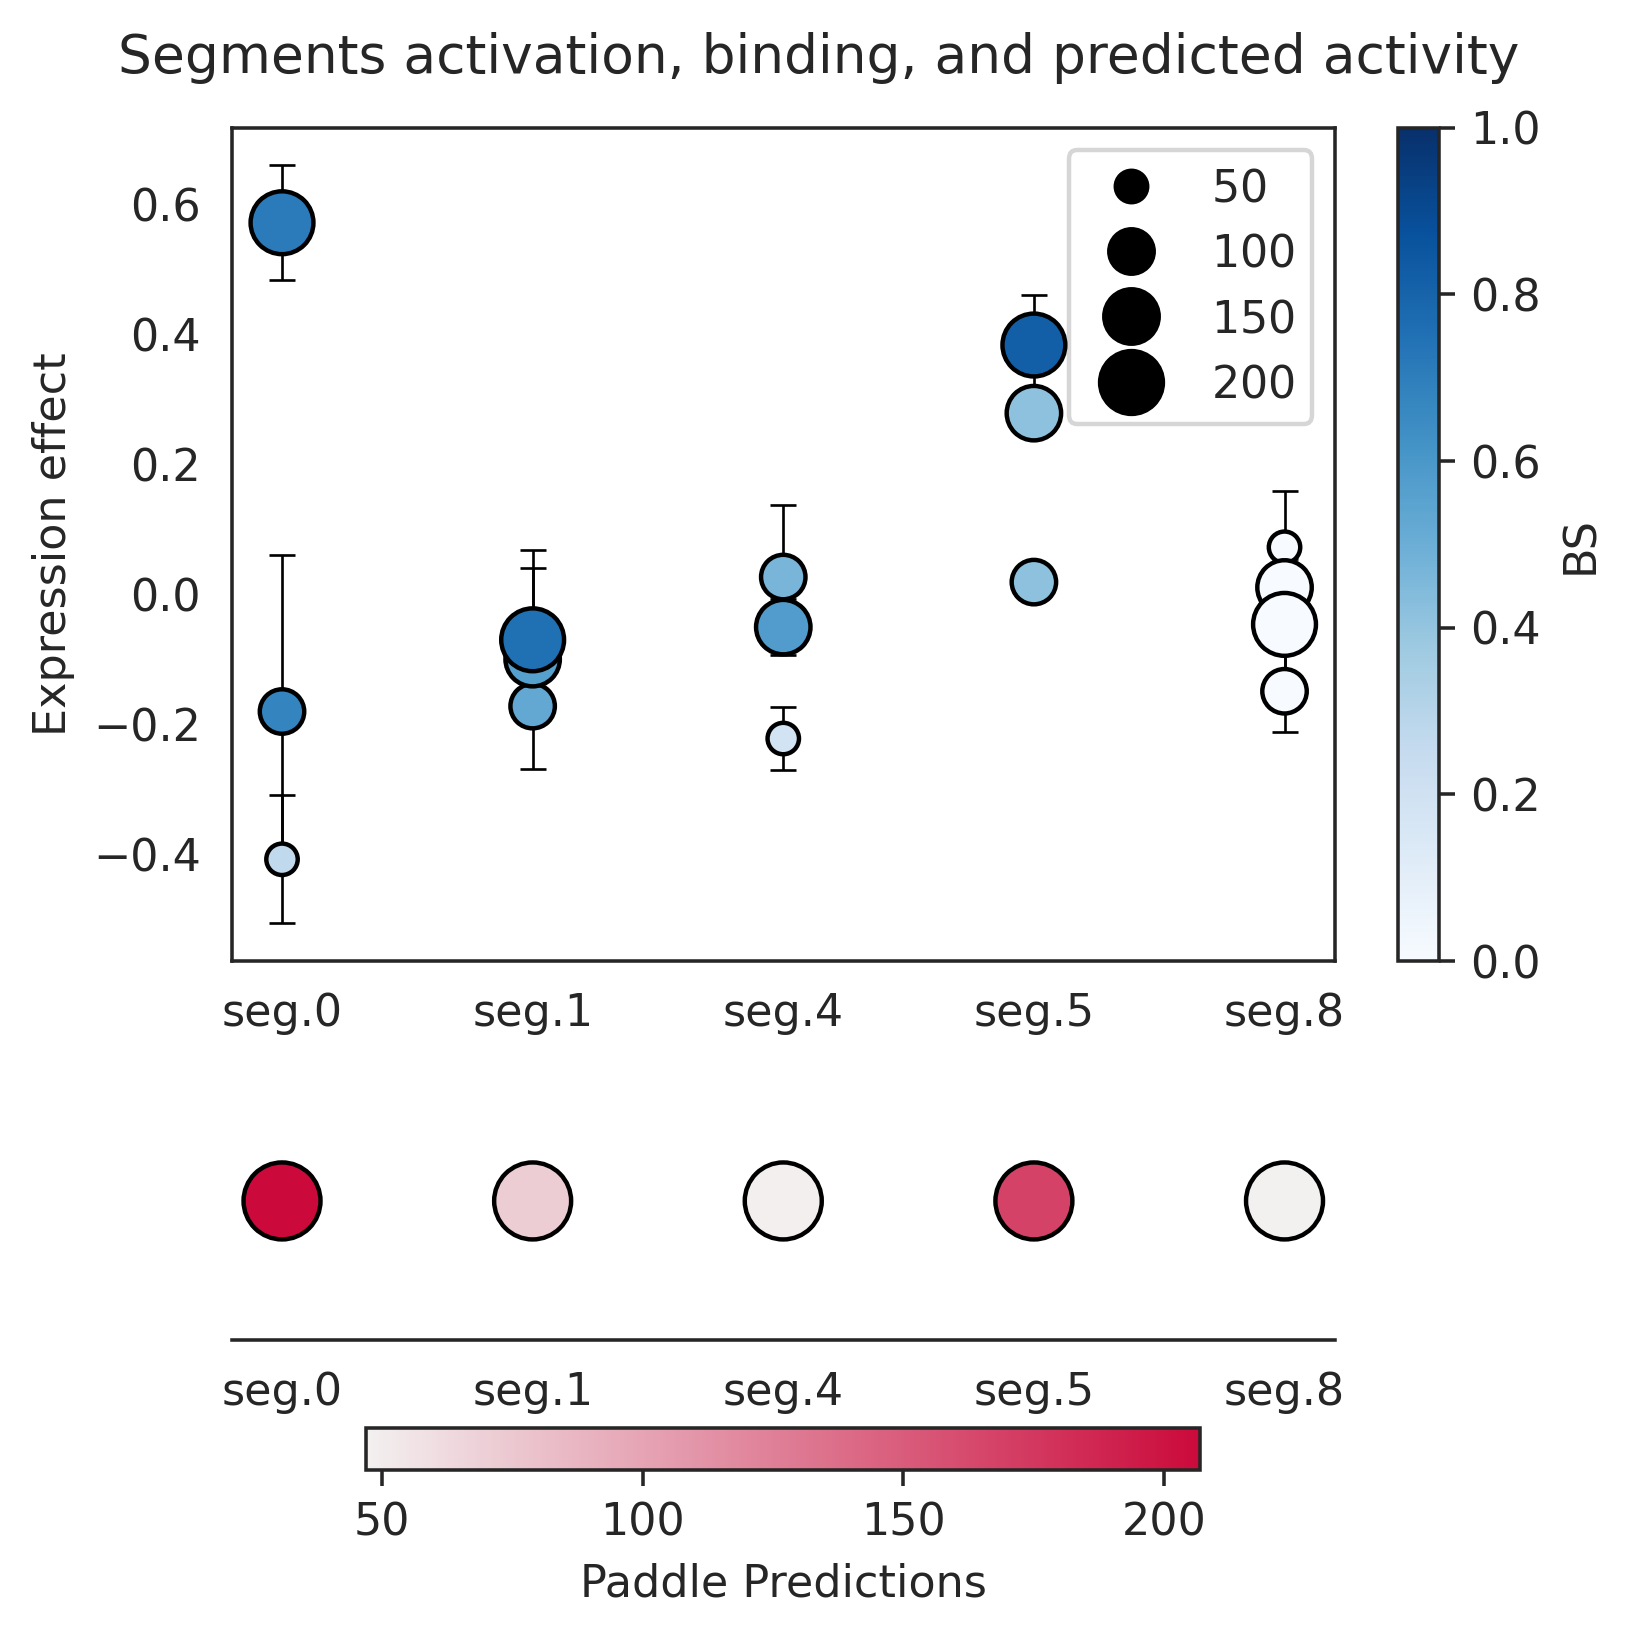

In [228]:
rep_table = all_table.query("Group=='rep' | Group=='control'").copy()
order = ['rep0','rep1','rep4','rep5','rep8','rep0x2','rep1x2','rep5x2','rep8x2','rep1x3','rep4x2','rep4x3','rep5x3','rep8x3','rep0x4','rep1x4','rep5x4','rep8x4']
nwn = ['rep0x1','rep1x1','rep4x1','rep5x1','rep8x1','rep0x2','rep1x2','rep5x2','rep8x2','rep1x3','rep4x2','rep4x3','rep5x3','rep8x3','rep0x4','rep1x4','rep5x4','rep8x4']
rep_table = rep_table.loc[order]
rep_table.index = nwn
xreps = list(rep_table.query("Group=='rep'").reset_index().loc[:, 'index'].apply(lambda x: int(x.split('x')[1])*50))
rep_table.loc[:, 'Info'] = rep_table.reset_index().loc[:, 'index'].apply(lambda x: x.split('x')[0]).values
rep_table.loc[:, 'xreps'] = xreps


fig, axes = plt.subplots(2,1, sharex=False, height_ratios=[3,1], figsize=(5,5), constrained_layout=True, dpi=160)
ax = axes[0]
s = ax.scatter(rep_table.Info, e_model_mean.loc[order], s=rep_table.xreps.values,
               c=b_model_mean.loc[order], cmap='Blues', edgecolors='k', zorder=20, vmax=1, vmin=0)
ax.errorbar(rep_table.Info, e_model_mean.loc[order].squeeze().values, e_model_sem.loc[order].squeeze().values, fmt='None', capsize=3, c='k', capthick=.6, elinewidth=.6)
fig.colorbar(s, label='BS')
ax.legend(*s.legend_elements("sizes", num=4), loc='upper right',)
ax.set_xticklabels(rep_table.Info.str.replace('rep', 'seg.'))
ax.set_ylabel('Expression effect')
paddle = rep_table.groupby('Info').agg(lambda x: list(x)[0]).Paddle_pred_sum - 81.80135

ax = axes[1]

s = ax.scatter(paddle.index, np.zeros(paddle.shape[0]), c=paddle, cmap=salmon_map, edgecolors='k', s=300)
ax.set_xticklabels(rep_table.Info.str.replace('rep', 'seg.'))

fig.colorbar(s, label='Paddle Predictions', location='bottom')
ax.set_yticklabels('')

sns.despine(ax=ax, top=True, right=True, left=True, bottom=False)
fig.suptitle('Segments activation, binding, and predicted activity')
fig.savefig('figures/Main/fig1/reps_bs_expression.pdf')
# plt.show()

# Figure 2

## Fig 2C

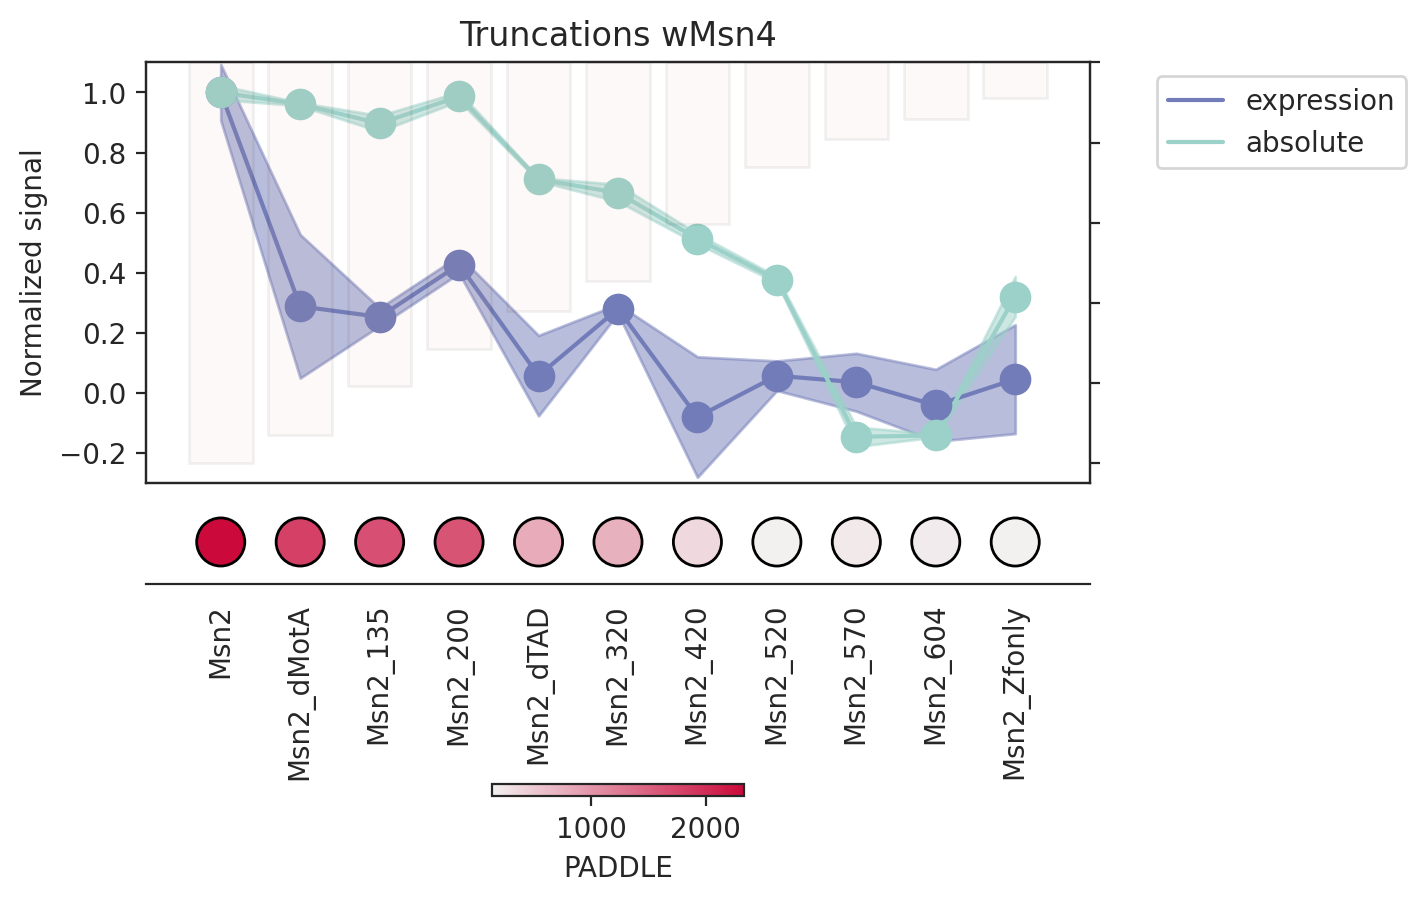

In [229]:
trunc = ['Msn2', 'Msn2_dMotA', 'Msn2_135',
  'Msn2_200','Msn2_dTAD', 'Msn2_320', 'Msn2_420', 'Msn2_520', 'Msn2_570', 'Msn2_604','Msn2_Zfonly',]
overlap = ['Msn2', 'Msn2_200', 'Msn2_150_350', 'Msn2_250_450', 'Msn2_350_550',
 'Msn2_150_450','Msn2_150_550', 'Msn2_250_550',
'Msn2_250_642','Msn2_450_642',]
trunc_len_perc = [1, 0.9289, 0.808, 0.7159, 0.6207, 0.5454, 0.4034, 0.2613, 0.19, 0.1420, 0.088068]
order = trunc
dat = all_table.loc[pd.Index(order).drop_duplicates()].loc[:, 'Median_exp_direct_targets']

x = range(dat.shape[0])
y1 = e_model_mean.loc[order]
y2 = b_model_mean_sag.loc[order]
fig, axes = plt.subplots(2,1, figsize=(7,4.4), height_ratios=[5,1], sharex=True, constrained_layout=True)
ax=axes[0]

size=130
ax.plot(x,y1,c='#727cb8', label='expression')
ax.scatter(x,y1,c='#727cb8',s=size, linewidths=0 ,zorder=20)
ax.fill_between(x, (y1 - e_model_sem.loc[pd.Index(order).drop_duplicates()]).squeeze().values,
                (y1 + e_model_sem.loc[pd.Index(order).drop_duplicates()]).squeeze().values,
                 color='#727cb8', alpha=0.5)

ax.plot(x, y2, label='absolute', c='#9cd1c9')
ax.scatter(x, y2, c='#9cd1c9',s=size, linewidths=0, zorder=20)
ax.fill_between(x, (y2 - b_model_sem.loc[pd.Index(order).drop_duplicates()]).squeeze().values,
                (y2 + b_model_sem.loc[pd.Index(order).drop_duplicates()]).squeeze().values,
                 color='#9cd1c9', alpha=.5)



secax = ax.twinx()
minus = lambda x: -x
secax.bar(x,list(map(minus,trunc_len_perc)), zorder=1, alpha=.05, edgecolor='k', color='darksalmon')
secax.set_yticklabels('')
ax.set_xticks(range(dat.shape[0]), dat.index, rotation=90)
ax.set_ylabel('Normalized signal')
ax.set_title('Truncations wMsn4')
ax.set_ylim([-.3,1.1])
ax.legend(bbox_to_anchor=[1,.5,.35,.5])


paddle = all_table.loc[order, 'Paddle_pred_sum']
ax = axes[1]
s = ax.scatter(paddle.index, np.zeros(paddle.shape[0]), c=paddle, cmap=salmon_map, edgecolors='k', s=300)
ax.set_xticks(range(dat.shape[0]), dat.index, rotation=90)
fig.colorbar(s, label='PADDLE', location='bottom')
ax.set_yticklabels('')
sns.despine(ax=ax, top=True, right=True, left=True, bottom=False)

fig.savefig('figures/Main/fig2/truncations_exp_abs.pdf')
plt.show()

## Fig2B

/tmp/ipykernel_25675/1754790029.py:29: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = d.figure.colorbar(sm,)
/tmp/ipykernel_25675/1754790029.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(labels=list(map(extract, cbar.ax.get_yticklabels())))


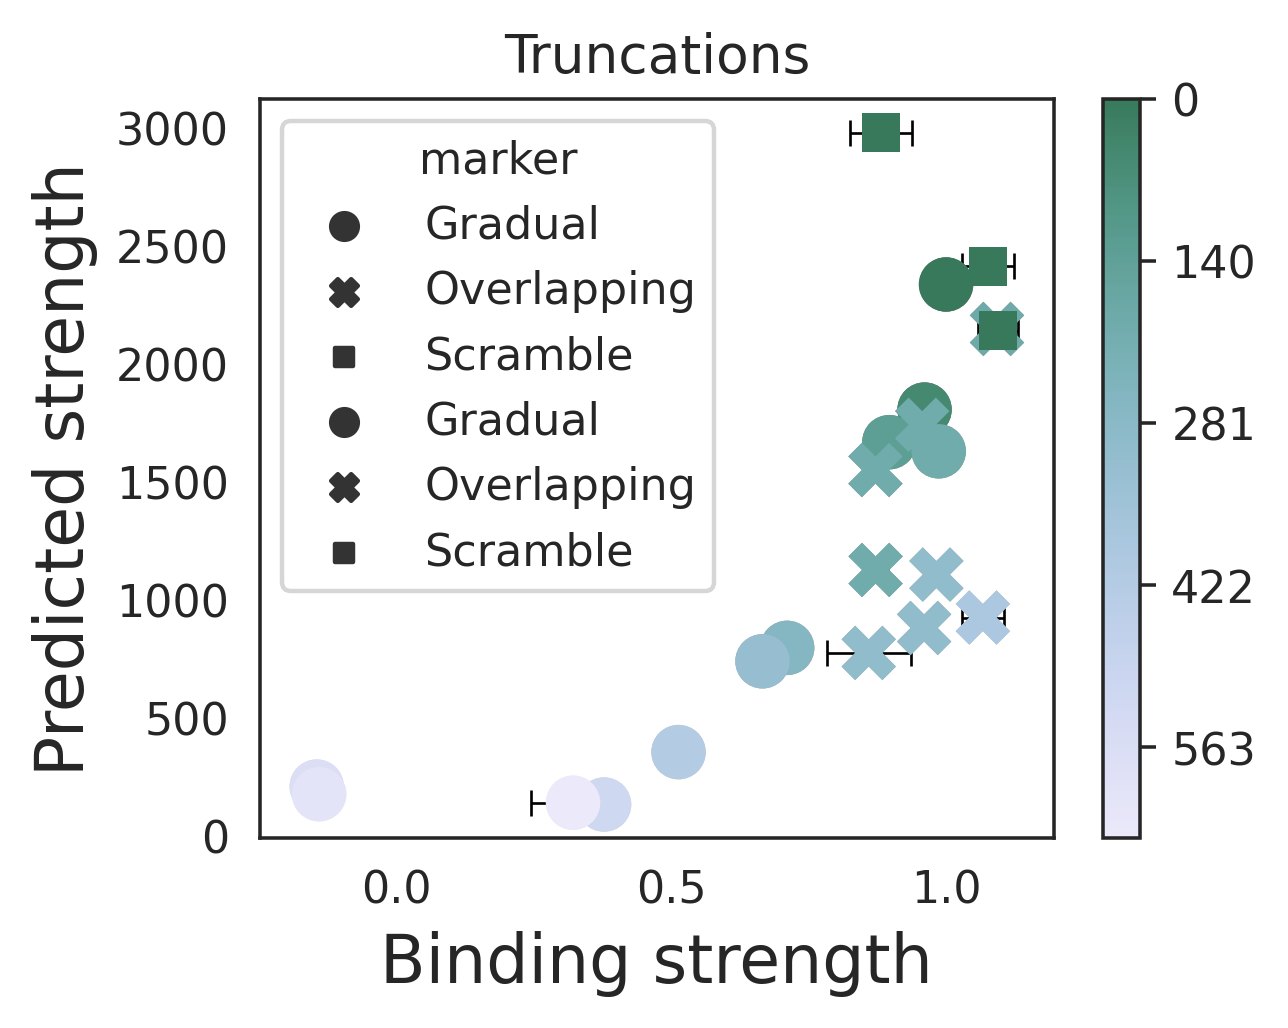

In [230]:
dat = pd.DataFrame(all_table.loc[pd.Index(trunc + ['Msn2_150_350', 'Msn2_250_450', 'Msn2_350_550',
 'Msn2_150_450','Msn2_150_550', 'Msn2_250_550',
'Msn2_250_642','Msn2_450_642', 'Msn2_Scramble1', 'Msn2_Scramble2', 'Msn2_Scramble3']).drop_duplicates(), 'Paddle_pred_sum'])


trunc_len_perc = [1, 0.9289, 0.808, 0.7159, 0.6207, 0.5454, 0.4034, 0.2613, 0.19, 0.1420, 0.088068, 0.7159, 0.7159, 0.7159,0.5738,0.5738,0.5738, 0.443, 0.727,1,1,1]


dat.loc[:, 'corrected_Msn2_Absolute'] = b_model_mean_sag.loc[dat.index]

dat.loc[:, 'color'] = trunc_len_perc
dat.loc[:, 'marker'] = ['Gradual']*11 + ['Overlapping']*8 + ['Scramble'] *3


fig, ax = plt.subplots(1, figsize=(4,3), dpi=160)
d = sns.scatterplot(data=dat, x='corrected_Msn2_Absolute', y='Paddle_pred_sum', s=150, c=dat.color, style='marker', linewidth=0, edgecolor='none', ax=ax, cmap=sns.color_palette("light:dimgray", as_cmap=True), zorder=20)
d = sns.scatterplot(data=dat, x='corrected_Msn2_Absolute', y='Paddle_pred_sum', s=150, c=dat.color, style='marker', linewidth=0, edgecolor='none', ax=ax, cmap=sns.cubehelix_palette(as_cmap=True,start=2,gamma=.5), zorder=20)

ax.errorbar(dat.corrected_Msn2_Absolute, dat.Paddle_pred_sum, xerr=b_model_sem_sag.loc[dat.index].squeeze().values, fmt='None', c='k', capsize=3, capthick=.6, elinewidth=.6)
ax.set_xlabel('Binding strength', size=15)
ax.set_ylabel('Predicted strength', size=15)
ax.set_title('Truncations')

norm = plt.Normalize(min(trunc_len_perc), max(trunc_len_perc))
sm = plt.cm.ScalarMappable(cmap=sns.color_palette("light:dimgray", as_cmap=True), norm=norm)
sm = plt.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True,start=2,gamma=.5), norm=norm)

sm.set_array([])
cbar = d.figure.colorbar(sm,)
extract = lambda x: 704 - int(np.ceil(704*float(x.get_text())))
orig = lambda x: float(x.get_text())
cbar.ax.set_yticklabels(labels=list(map(extract, cbar.ax.get_yticklabels())))

fig.savefig('figures/Main/fig2/truncations_paddle_binding.pdf')


## Fig2D

/tmp/ipykernel_25675/2509398884.py:72: UserWarning: FixedFormatter should only be used together with FixedLocator
  secax.set_xticklabels(dat.index, rotation=90)


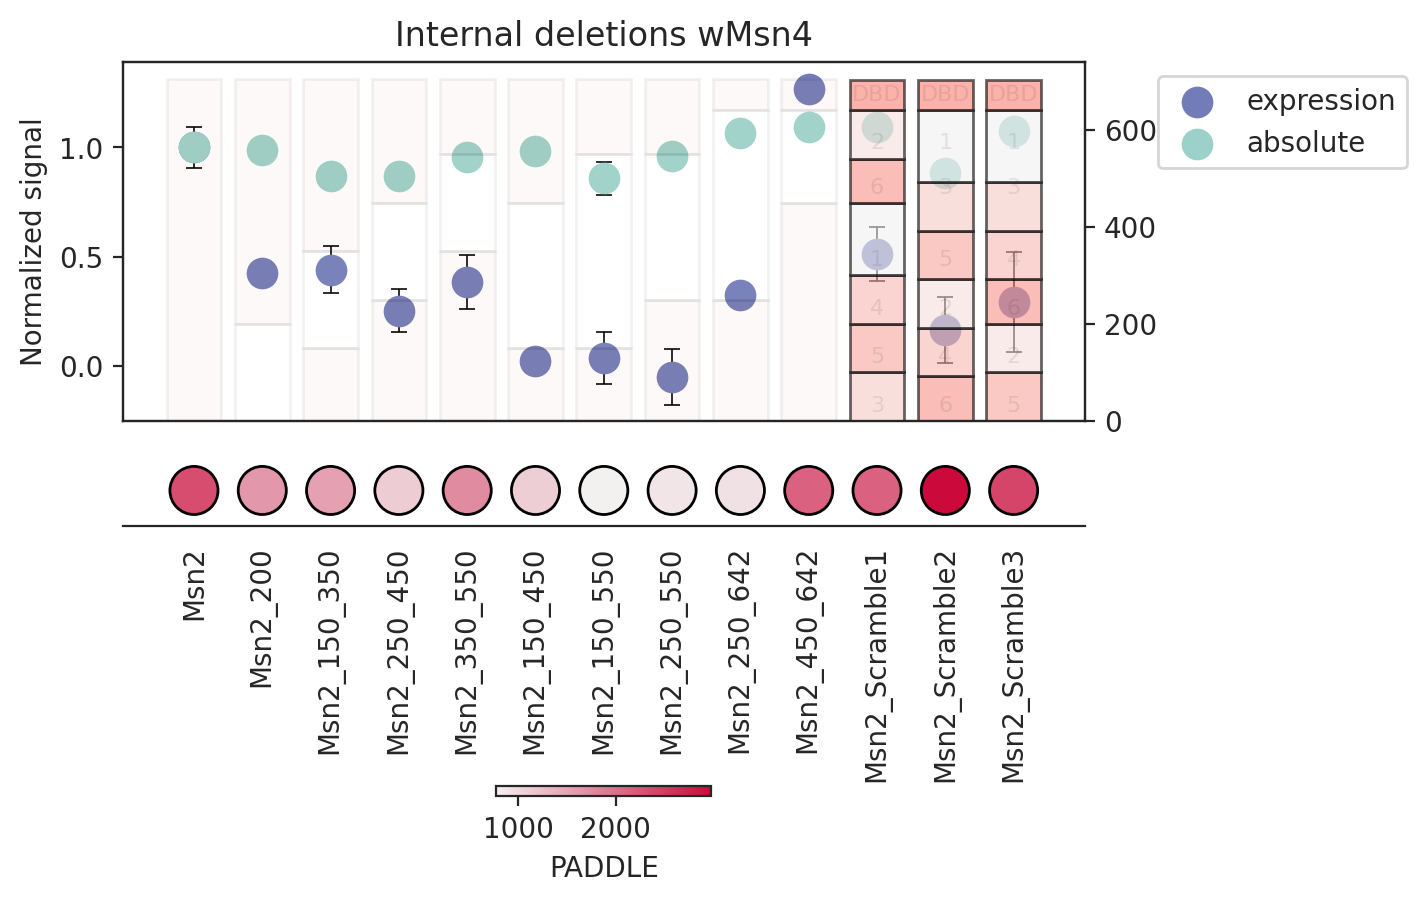

In [231]:

order = ['Msn2', 'Msn2_200', 'Msn2_150_350', 'Msn2_250_450', 'Msn2_350_550',
 'Msn2_150_450','Msn2_150_550', 'Msn2_250_550',
'Msn2_250_642','Msn2_450_642', 'Msn2_Scramble1', 'Msn2_Scramble2', 'Msn2_Scramble3']
dat = all_table.loc[pd.Index(order).drop_duplicates()].loc[:,'Median_exp_direct_targets']
order = dat.index
x = range(dat.shape[0])
y=e_model_mean.loc[order]


fig, axes = plt.subplots(2,1, figsize=(7,4.4), height_ratios=[5,1], sharex=True, constrained_layout=True)
ax=axes[0]

secax = ax.twinx()
species = (
    'Msn2', 'Msn2_200', 'Msn2_150_350', 'Msn2_250_450', 'Msn2_350_550',
       'Msn2_150_450', 'Msn2_150_550', 'Msn2_250_550', 'Msn2_250_642',
       'Msn2_450_642'
)
weight_counts = {
    "Above": np.array([0, 0, 150, 250, 350, 150,150,250,250, 450]),
    "Middle": np.array([0, 200, 200, 200, 200,300,400,300, 392, 192]),
     "Below": np.array([704, 504, 354,254, 154, 254,154,154, 62, 62]),
    
}
width = 0.5
bottom = np.zeros(10)

c = {'Below':'darksalmon', 'Middle':'w', 'Above':'darksalmon'}
# i
for boolean, weight_count in weight_counts.items():
    p = secax.bar(species, weight_count, .8, bottom=bottom, color=c[boolean], edgecolor='k', alpha=0.05, zorder=1)
    bottom += weight_count

    
species = (
'Msn2_Scramble1', 'Msn2_Scramble2', 'Msn2_Scramble3'
)

scr_len = np.array([149,100,100,100,100,92,62])
scr1 = scr_len[np.array([2,4,3,0,5,1,6])]
scr2 = scr_len[np.array([5,3,1,4,2,0,6])]
scr3 = scr_len[np.array([4,1,5,3,2,0,6])]
a = sns.color_palette("light:salmon", n_colors=7)
hex_colors = np.array(a.as_hex())
scr1_c = hex_colors[np.array([2,4,3,0,5,1,6])]
scr2_c = hex_colors[np.array([5,3,1,4,2,0,6])]
scr3_c = hex_colors[np.array([4,1,5,3,2,0,6])]
scr_c = np.array([scr1_c, scr2_c, scr3_c]).T

weight_counts = dict(zip(np.arange(dat.index.shape[0]), np.array([scr1, scr2, scr3]).T)) 
width = 0.5
bottom = np.zeros(3)


t1 = list(np.array([2,4,3,0,5,1])+1) + ['DBD']
t2 = list(np.array([5,3,1,4,2,0])+1) + ['DBD']
t3 = list(np.array([4,1,5,3,2,0])+1) + ['DBD']


for boolean, weight_count in weight_counts.items():
    c = scr_c[boolean]
    p = secax.bar(species, weight_count, .8, bottom=bottom, color=c, edgecolor='k', alpha=0.6, zorder=1)

    secax.text(10, bottom[0]+20, t1[boolean], zorder=20, alpha=0.1, horizontalalignment='center', size=8)
    secax.text(11, bottom[0]+20,t2[boolean], zorder=20, alpha=0.1, horizontalalignment='center', size=8)
    secax.text(12, bottom[0]+20,t3[boolean], zorder=20, alpha=0.1, horizontalalignment='center', size=8)

    bottom += weight_count



secax.set_xticklabels(dat.index, rotation=90)

s=130
ax.scatter(x,y, label='expression', s=s,c='#727cb8', linewidth=0, zorder=20)
ax.errorbar(x, y.squeeze().values, e_model_sem.loc[order].squeeze().values, fmt='None', c='k', capsize=3, capthick=.6, elinewidth=.6)

ax.scatter(x, b_model_mean_sag.loc[order], label='absolute', s=s, linewidth=0, zorder=20, c='#9cd1c9')
ax.errorbar(x, b_model_mean_sag.loc[order].squeeze().values, b_model_sem_sag.loc[order].squeeze().values, fmt='None', c='k', capsize=3, capthick=.6, elinewidth=.6)

ax.set_xticks(range(dat.shape[0]), dat.index, rotation=90)
ax.set_ylabel('Normalized signal')
ax.set_title('Internal deletions wMsn4')
ax.legend(bbox_to_anchor=[1,.5,.35,.5])


paddle = all_table.loc[order, 'Paddle_pred_sum']
ax = axes[1]

s = ax.scatter(paddle.index, np.zeros(paddle.shape[0]), c=paddle, cmap=salmon_map, edgecolors='k', s=300)
ax.set_xticks(range(dat.shape[0]), dat.index, rotation=90)

fig.colorbar(s, label='PADDLE', location='bottom')
ax.set_yticklabels('')

sns.despine(ax=ax, top=True, right=True, left=True, bottom=False)

fig.savefig('figures/Main/fig2/overlap_exp_abs.pdf')

plt.show()

# Figure3

## Fig 3C

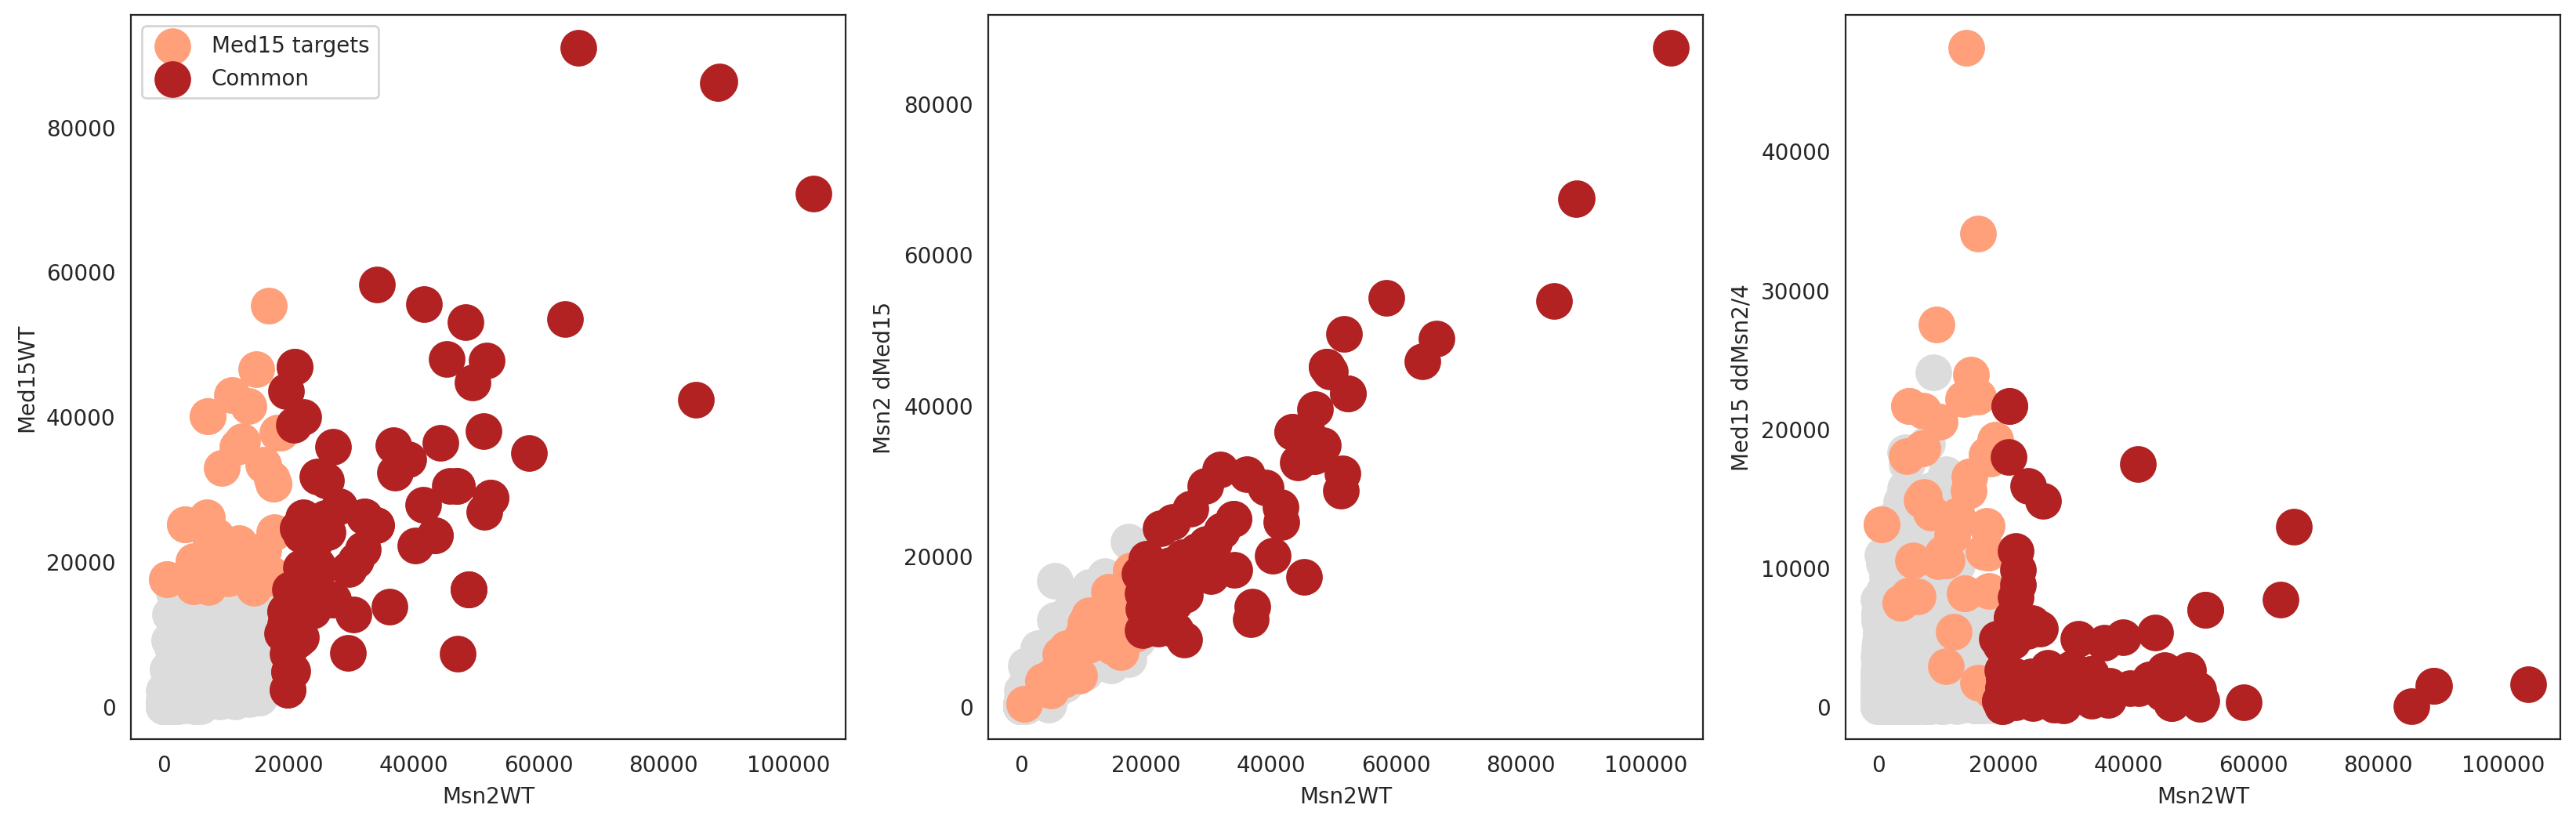

In [232]:
def scatter(x, y, ax, legend=False):
    size=250
    ax.scatter(x, y, c='gainsboro', s=size)
    ax.scatter(x.loc[med_targets],y.loc[med_targets], s=size, label='Med15 targets', c='lightsalmon')
    ax.scatter(x.loc[msn2t], y.loc[msn2t], s=size, label='Common', c='firebrick')
    # ax.scatter(x.loc[targets], y.loc[targets], edgecolors='k', s=size, label='WT direct targets', facecolors="None",linewidth=.5)
    if legend:
        ax.legend()
fig, ax = plt.subplots(1,3, figsize=(20,6), sharex=True, sharey=False)
scatter(sp_og.loc[:, 'Msn2'], med.loc[:,'Msn2'], ax[0], legend=True)
scatter(sp_og.loc[:, 'Msn2'], sp_og.loc[:, 'Msn2_dGal11'], ax[1], legend=False)
scatter(sp_og.loc[:, 'Msn2'], offir_dat.loc[:, 'Gal11_ddmsn'], ax[2], legend=False)
ax[0].set_xlabel('Msn2WT')
ax[0].set_ylabel('Med15WT')
ax[1].set_xlabel('Msn2WT')
ax[1].set_ylabel('Msn2 dMed15')
ax[2].set_xlabel('Msn2WT')
ax[2].set_ylabel('Med15 ddMsn2/4')
fig.savefig('figures/Main/fig3/med15_intro.pdf')

## Fig 3B

/tmp/ipykernel_25675/4030029690.py:3: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x = exp_data.loc[binding_comp.index, ['Msn2', 'MSN2_start_nls', 'Msn2_dGal11']].median().index,
/tmp/ipykernel_25675/4030029690.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Msn2', 'Msn2DBD', 'Msn2_dMed15'], rotation=90)


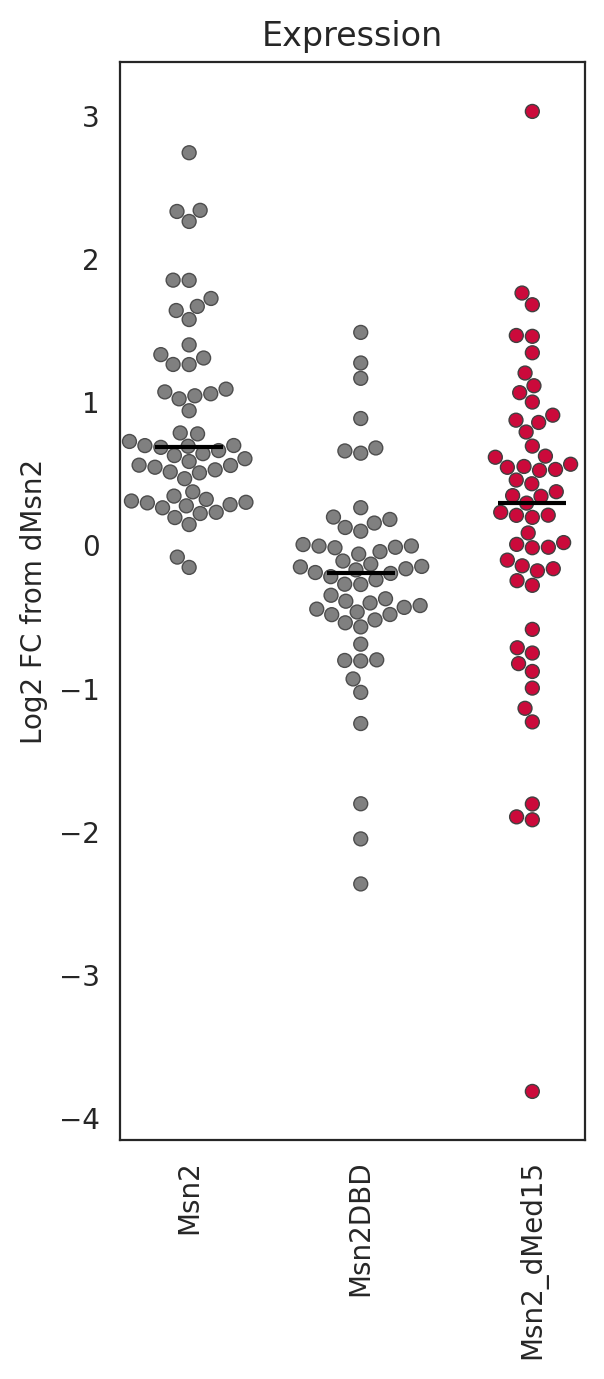

In [233]:
fig, ax = plt.subplots(1, figsize=(3,7))
sns.swarmplot(exp_data.loc[binding_comp.index, ['Msn2', 'MSN2_start_nls', 'Msn2_dGal11']], palette=['gray','gray', '#cb0a3b'], edgecolors='k', linewidth=.5, ax=ax)
ax.scatter(x = exp_data.loc[binding_comp.index, ['Msn2', 'MSN2_start_nls', 'Msn2_dGal11']].median().index,
          y = exp_data.loc[binding_comp.index, ['Msn2', 'MSN2_start_nls','Msn2_dGal11']].median().values, s=600, zorder=20, marker='_', c='k', edgecolors='k')

ax.set_ylabel('Log2 FC from dMsn2')
ax.set_xticklabels(['Msn2', 'Msn2DBD', 'Msn2_dMed15'], rotation=90)
ax.set_title('Expression')
fig.savefig('figures/Main/fig3/msn2_dmed15_expression.pdf')

## Fig 3D

In [234]:
med_truncations = ['Msn2', 'Msn2_dMotA', 'Msn2_135', 'Msn2_200','Msn2_dTAD', 'Msn2_320', 'Msn2_420',]
med_overlap = ['Msn2', 'Msn2_200','Msn2_150_350', 'Msn2_250_450', 'Msn2_350_550',]



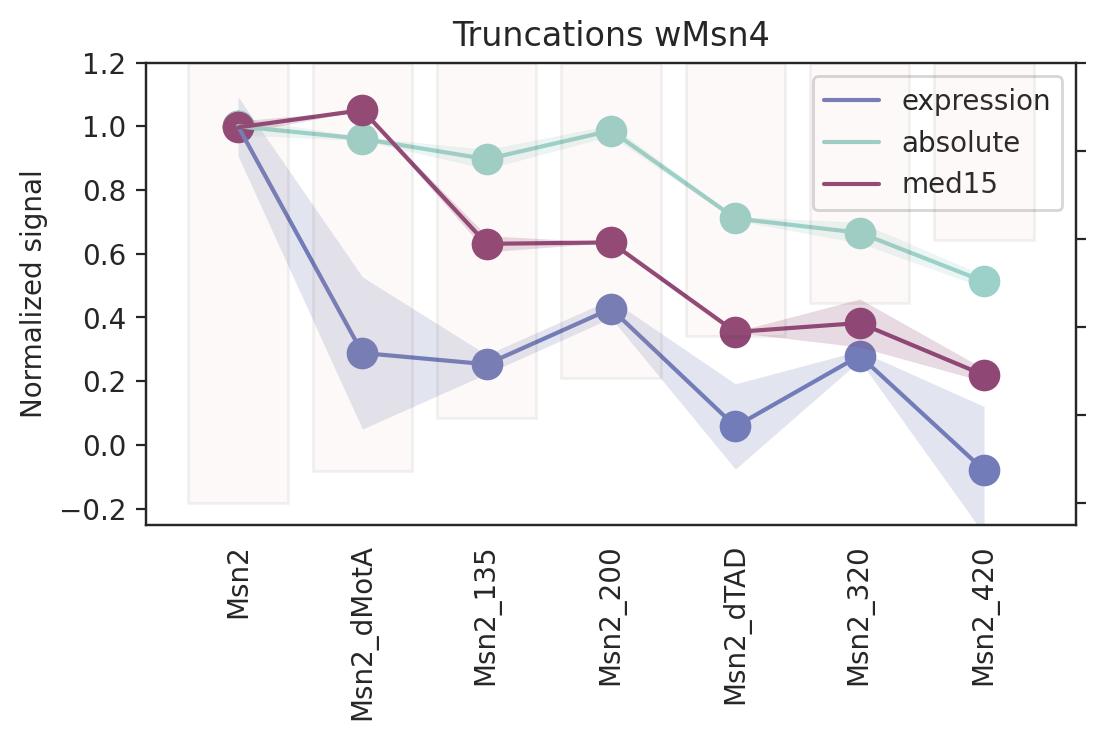

In [235]:
order = ['Msn2', 'Msn2_dMotA', 'Msn2_135',
  'Msn2_200','Msn2_dTAD', 'Msn2_320', 'Msn2_420']
trunc_len_perc = [1, 0.9289, 0.808, 0.7159, 0.6207, 0.5454, 0.4034]


# dat = all_table.loc[pd.Index(order).drop_duplicates()].loc[:, ['corrected_Msn2_Absolute', 'Median_exp_direct_targets']]

x = range(len(order))
y = e_model_mean.loc[order]
size=130

fig, ax = plt.subplots(1, figsize=(6,3))
ax.plot(x,y,c='#727cb8', label='expression', )
ax.scatter(x,y,c='#727cb8', s=size, linewidths=0)
ax.fill_between(x, (y - e_model_sem.loc[pd.Index(order).drop_duplicates()]).squeeze().values,
                (y + e_model_sem.loc[pd.Index(order).drop_duplicates()]).squeeze().values,
                 color='#727cb8', alpha=0.2, edgecolor='k', linewidths=0)
y = b_model_mean_sag.loc[order]

ax.plot(x, y,c='#9cd1c9', label='absolute', )
ax.scatter(x, y, c='#9cd1c9', s=size, linewidths=0)
ax.fill_between(x, (y - b_model_sem_sag.loc[pd.Index(order).drop_duplicates()]).squeeze().values,
                (y + b_model_sem_sag.loc[pd.Index(order).drop_duplicates()]).squeeze().values,
                 color='#9cd1c9', alpha=0.2, edgecolor='k', linewidths=0)
x = list(map(pd.Index(order).drop_duplicates().get_loc, med_truncations))
y = m_model_mean.loc[med_truncations]
ax.plot(x, y, label='med15', c='#8f4875')
ax.scatter(x,y, s=size, linewidths=0, c='#8f4875')
ax.fill_between(x,
       (y - m_model_sem.loc[pd.Index(med_truncations).drop_duplicates()]).squeeze().values,
                (y + m_model_sem.loc[pd.Index(med_truncations).drop_duplicates()]).squeeze().values,
               color='#8f4875', alpha=0.2, edgecolor='k', linewidths=0)


ax.set_xticks(range(len(order)), order, rotation=90)
ax.set_ylabel('Normalized signal')
ax.set_title('Truncations wMsn4')
ax.legend()
ax.set_ylim([-.25, 1.2, ])
secax = ax.twinx()
minus = lambda x: -x
secax.bar(x,list(map(minus,trunc_len_perc)), zorder=1, alpha=.05, edgecolor='k', color='darksalmon')
secax.set_yticklabels('')
fig.savefig('figures/Main/fig3/truncations_wmed15.pdf')
plt.show()

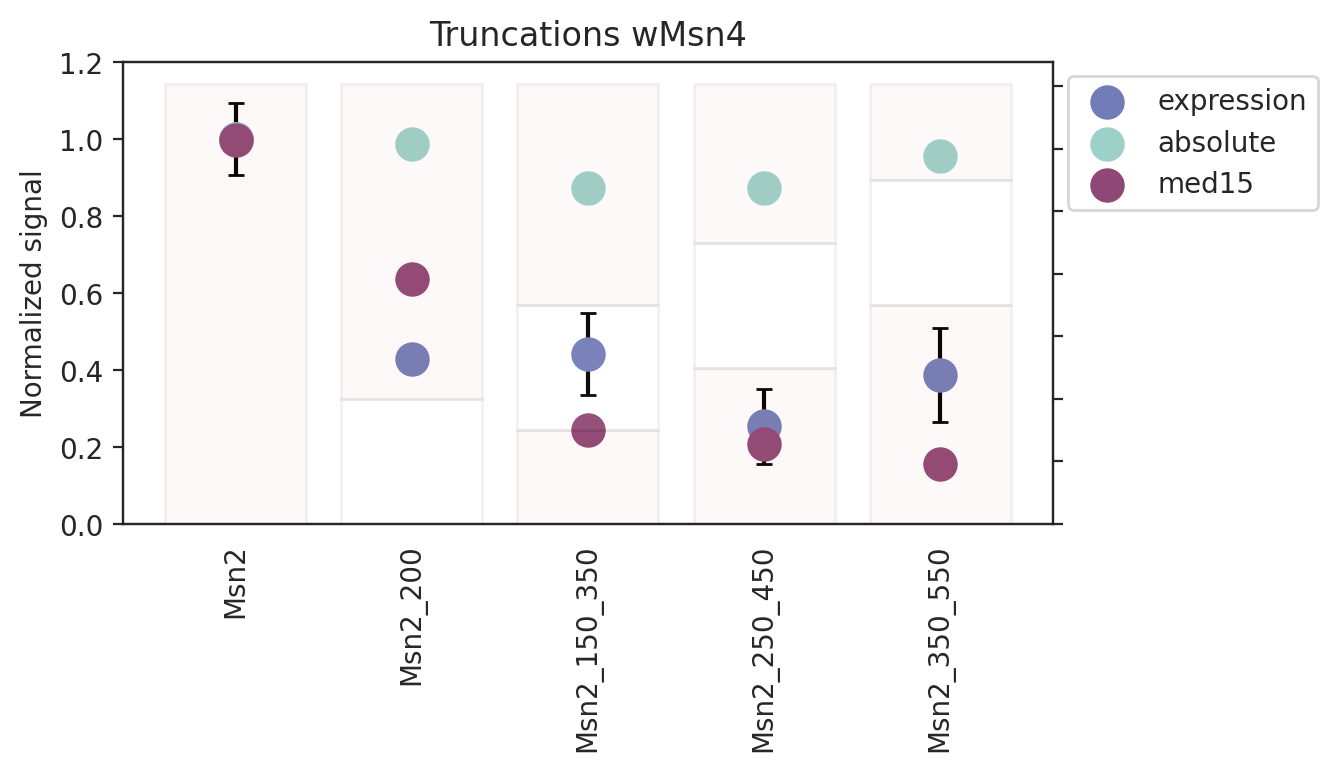

In [236]:
order = ['Msn2', 'Msn2_200', 'Msn2_150_350', 'Msn2_250_450', 'Msn2_350_550',]

dat = all_table.loc[pd.Index(order).drop_duplicates()].loc[:, 'Median_exp_direct_targets']

x = range(dat.shape[0])
x1 = list(map(pd.Index(order).drop_duplicates().get_loc, med_overlap))

y1 = e_model_mean.loc[order]
y2 = b_model_mean_sag.loc[order]
y3 = m_model_mean.loc[order]

size=130

fig, ax = plt.subplots(1, figsize=(6,3))
ax.scatter(x, y1 ,c='#727cb8', zorder=20, s=size, label='expression')
ax.scatter(x, y2,c='#9cd1c9', zorder=20, s=size, label='absolute')
ax.scatter(x1,y3, c='#8f4875', zorder=20, s=size, label='med15')

ax.errorbar(x, y1.squeeze().values, e_model_sem.loc[order].squeeze().values,
            fmt='None', capsize=3, c='k', linestyle='--')
ax.errorbar(x, y2.squeeze().values, b_model_sem.loc[order].squeeze().values,
            fmt='None', capsize=3, c='k', linestyle='--')
ax.errorbar(x1, y3.squeeze().values, m_model_sem.loc[order].squeeze().values,
            fmt='None', capsize=3, c='k', linestyle='--')

ax.set_xticks(range(dat.shape[0]), dat.index, rotation=90)
ax.set_ylabel('Normalized signal')
ax.set_title('Truncations wMsn4')
ax.legend(bbox_to_anchor=[.8,.5,.5,.5])
ax.set_ylim([0, 1.2, ])

secax = ax.twinx()
species = (
    'Msn2', 'Msn2_200', 'Msn2_150_350', 'Msn2_250_450', 'Msn2_350_550',
)
weight_counts = {
    "Above": np.array([0, 0, 150, 250, 350, ]),
    "Middle": np.array([0, 200, 200, 200, 200,]),
     "Below": np.array([704, 504, 354,254, 154,]),
    
}
width = 0.5
bottom = np.zeros(5)

c = {'Below':'darksalmon', 'Middle':'w', 'Above':'darksalmon'}
# i
for boolean, weight_count in weight_counts.items():
    p = secax.bar(species, weight_count, .8, bottom=bottom, color=c[boolean], edgecolor='k', alpha=0.05, zorder=1)
    bottom += weight_count
secax.set_yticklabels('')
fig.savefig('figures/Main/fig3/overlapping_wmed15.pdf')

plt.show()

## Fig3E

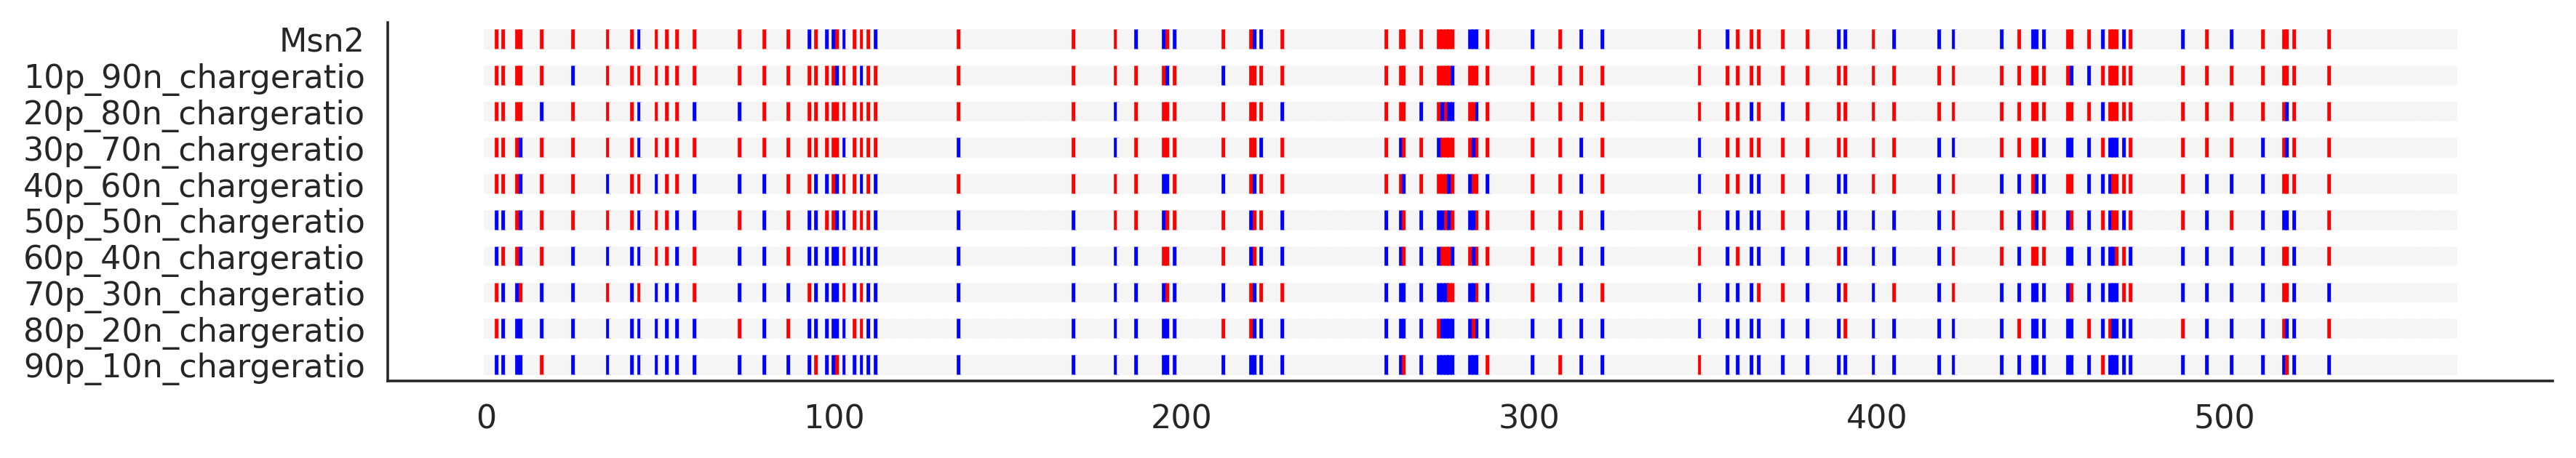

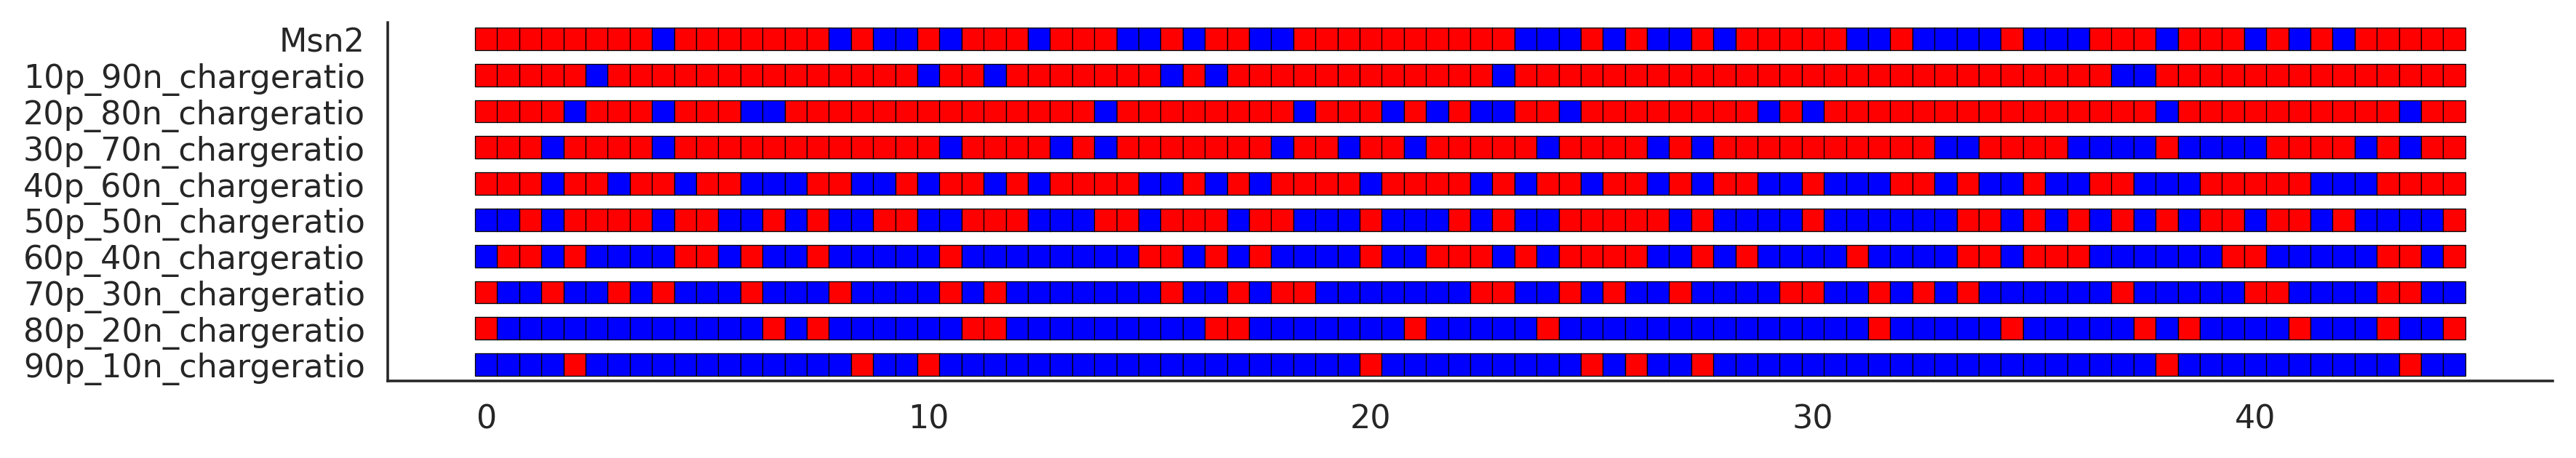

In [237]:
data_table = pd.read_csv('data/strain_data_table.csv', index_col=1).loc[:, ['Msn2_Amino_acid_seq_nozf', 'Msn2_Amino_acid_seq_wzf']]

order = ['Msn2', '10p_90n_chargeratio', '20p_80n_chargeratio', '30p_70n_chargeratio',
 '40p_60n_chargeratio', '50p_50n_chargeratio', '60p_40n_chargeratio', '70p_30n_chargeratio',
 '80p_20n_chargeratio', '90p_10n_chargeratio']

nozf_seqs_chargeratio = data_table.loc[order, 'Msn2_Amino_acid_seq_nozf']

seq = nozf_seqs_chargeratio.loc['Msn2']

def colour_letter(letter):
    if letter.upper() in ['D', 'E']:
        return 'r'
    elif letter.upper() in ['K', 'R']:
        return 'b'
    else:
        return 'whitesmoke'
    
numeric = dict()
for name, seq in nozf_seqs_chargeratio.to_dict().items():
    numeric[name] = list(map(colour_letter, seq))
coloured = pd.DataFrame(numeric).transpose()

custom = sns.color_palette("blend:#6470b5,#E5E4E2,#cb0a3b", as_cmap=True)

fig, ax = plt.subplots(1, dpi=160, figsize=(12,2))
i = coloured.shape[0]
while i > 0:
    ax.scatter(np.arange(coloured.shape[1]), np.zeros(coloured.shape[1])+i, 
               c=coloured.iloc[-i].values, marker='|')
    i -= 1
ax.set_yticks(range(1, coloured.shape[0]+1), coloured.index.values[::-1])
sns.despine(fig)
# ax.set_xlim([-1, 150])
fig.savefig('figures/Main/fig3/scheme_cahrgeratio_full.pdf')


coloured = coloured[coloured != 'whitesmoke'].dropna(axis=1)

fig, ax = plt.subplots(1, dpi=160, figsize=(12,2))
i = coloured.shape[0]
while i > 0:
    ax.scatter(np.arange(start=0, stop=coloured.shape[1]/2, step=.5), np.zeros(coloured.shape[1])+i, 
               c=coloured.iloc[-i].values, marker='s', edgecolors='k', linewidths=.3, s=48)
    i -= 1
ax.set_yticks(range(1, coloured.shape[0]+1), coloured.index.values[::-1])
sns.despine(fig)
# ax.set_xlim([-1, 150])
fig.savefig('figures/Main/fig3/scheme_cahrgeratio.pdf')


## Fig3F

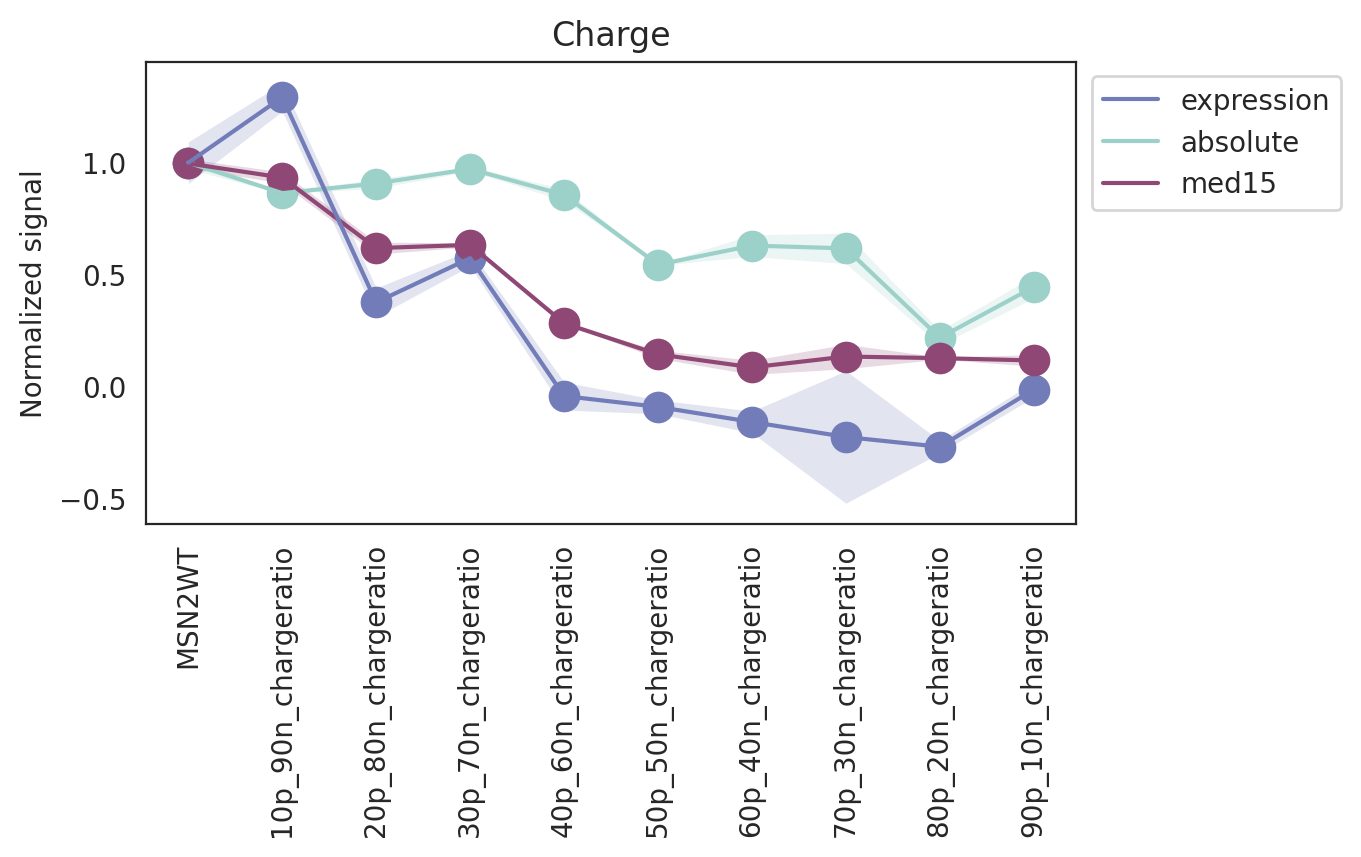

In [238]:

eorder = ['Msn2', '10p_90n_chargeratio', '20p_80n_chargeratio', '30p_70n_chargeratio',
 '40p_60n_chargeratio', '50p_50n_chargeratio', '60p_40n_chargeratio', '70p_30n_chargeratio',
 '80p_20n_chargeratio', '90p_10n_chargeratio']

order = ['MSN2WT', '10p_90n_chargeratio', '20p_80n_chargeratio', '30p_70n_chargeratio',
 '40p_60n_chargeratio', '50p_50n_chargeratio', '60p_40n_chargeratio', '70p_30n_chargeratio',
 '80p_20n_chargeratio', '90p_10n_chargeratio']



dat = all_table.loc[pd.Index(order).drop_duplicates()].loc[:, 'Median_exp_direct_targets']

x = range(dat.shape[0])
y1 = e_model_mean.loc[eorder].squeeze().values
y2 = b_model_mean.loc[dat.index].squeeze().values
y3 = m_model_mean.loc[eorder].squeeze().values

y1_err = e_model_sem.loc[eorder].squeeze().values
y2_err = b_model_sem.loc[dat.index].squeeze().values
y3_err = m_model_sem.loc[eorder].squeeze().values
fig, ax = plt.subplots(1, figsize=(6,3))
size=130

ax.plot(x,y1, label='expression', zorder=20,c='#727cb8',)
ax.scatter(x,y1, s=size, linewidths=0,c='#727cb8',)
ax.fill_between(x, (y1-y1_err), (y1+y1_err), alpha=0.2, linewidths=0, color='#727cb8',)

ax.plot(x, y2, label='absolute',c='#9cd1c9',)
ax.scatter(x, y2, s=size, linewidths=0, c='#9cd1c9',)
ax.fill_between(x, y2-y2_err,y2+y2_err,
                  alpha=0.2,  linewidths=0, color='#9cd1c9',)

ax.scatter(x, y3, c='#8f4875', s=size, linewidths=0)
ax.plot(x, y3, label='med15', color='#8f4875',)
ax.fill_between(x, y3-y3_err, y3+y3_err,
                  alpha=0.2, linewidths=0, color='#8f4875',)
# ax.set_xlim([-0.5,1.3])


ax.set_xticks(range(dat.shape[0]), dat.index, rotation=90)
ax.set_ylabel('Normalized signal')
ax.set_title('Charge')
ax.legend(bbox_to_anchor=[.8,.5,.5,.5])
secax.set_frame_on(False)

fig.savefig('figures/Main/fig3/chargeratio_all.pdf')

plt.show()

# Figure4

## Fig4C+D

In [359]:
def subgroup_def(name):
    if 'spread' in name:
        return 'spread'
    elif 'cluster' in name or name == 'Left_positive_right_negative':
        return 'cluster'
    elif 'shift' in name or 'swapped' in name:
        return 'shift/NS_swapped'
    elif 'Scramble' in name or 'random' in name:
        return 'random'
    else:
        return 'none'



problematic = ['Msn2_Scramble10', 'LIV_cluster1', 'ED_shift1']
not_needed = ['Msn2', 'Msn2_Scramble1', 'Msn2_Scramble2', 'Msn2_Scramble3', 'Msn2_Scramble30', 'Msn2_dGal11','MotA_NLS', 'Msn2_dZF']
dat = all_table.query("Group=='preserving' or Group=='control'").drop(problematic+not_needed).loc[:, ['Group', 'Paddle_pred_sum']].copy()
expression_overlap = set(average.columns).intersection(all_table.query("Group=='preserving' or Group=='control'").index)
median_overlap = set(med.columns).intersection(all_table.query("Group=='preserving' or Group=='control'").index)


dat.loc[:, 'corrected_Msn2_Absolute'] = b_model_mean.loc[dat.index]
dat = pd.concat([dat, e_model_mean.loc[expression_overlap]], axis=1)

dat = pd.concat([dat, m_model_mean.loc[median_overlap]], axis=1)
dat.columns = ['Group', 'Paddle_pred_sum', 'corrected_Msn2_Absolute', 'norm_expression', 'norm_med15']
dat.loc[:, 'subgroups'] = list(map(subgroup_def, dat.index))

dat = dat.drop(not_needed+problematic)
dat = dat.rename({'MSN2WT':'Msn2'})
dat.loc['Msn2'] = ['preserving', 2335.6523, 1.0064712788282884, 1, 1, 'none']

/tmp/ipykernel_25675/2351139214.py:23: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  dat = pd.concat([dat, e_model_mean.loc[expression_overlap]], axis=1)
/tmp/ipykernel_25675/2351139214.py:25: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  dat = pd.concat([dat, m_model_mean.loc[median_overlap]], axis=1)


/tmp/ipykernel_25675/3466730660.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, size=5)


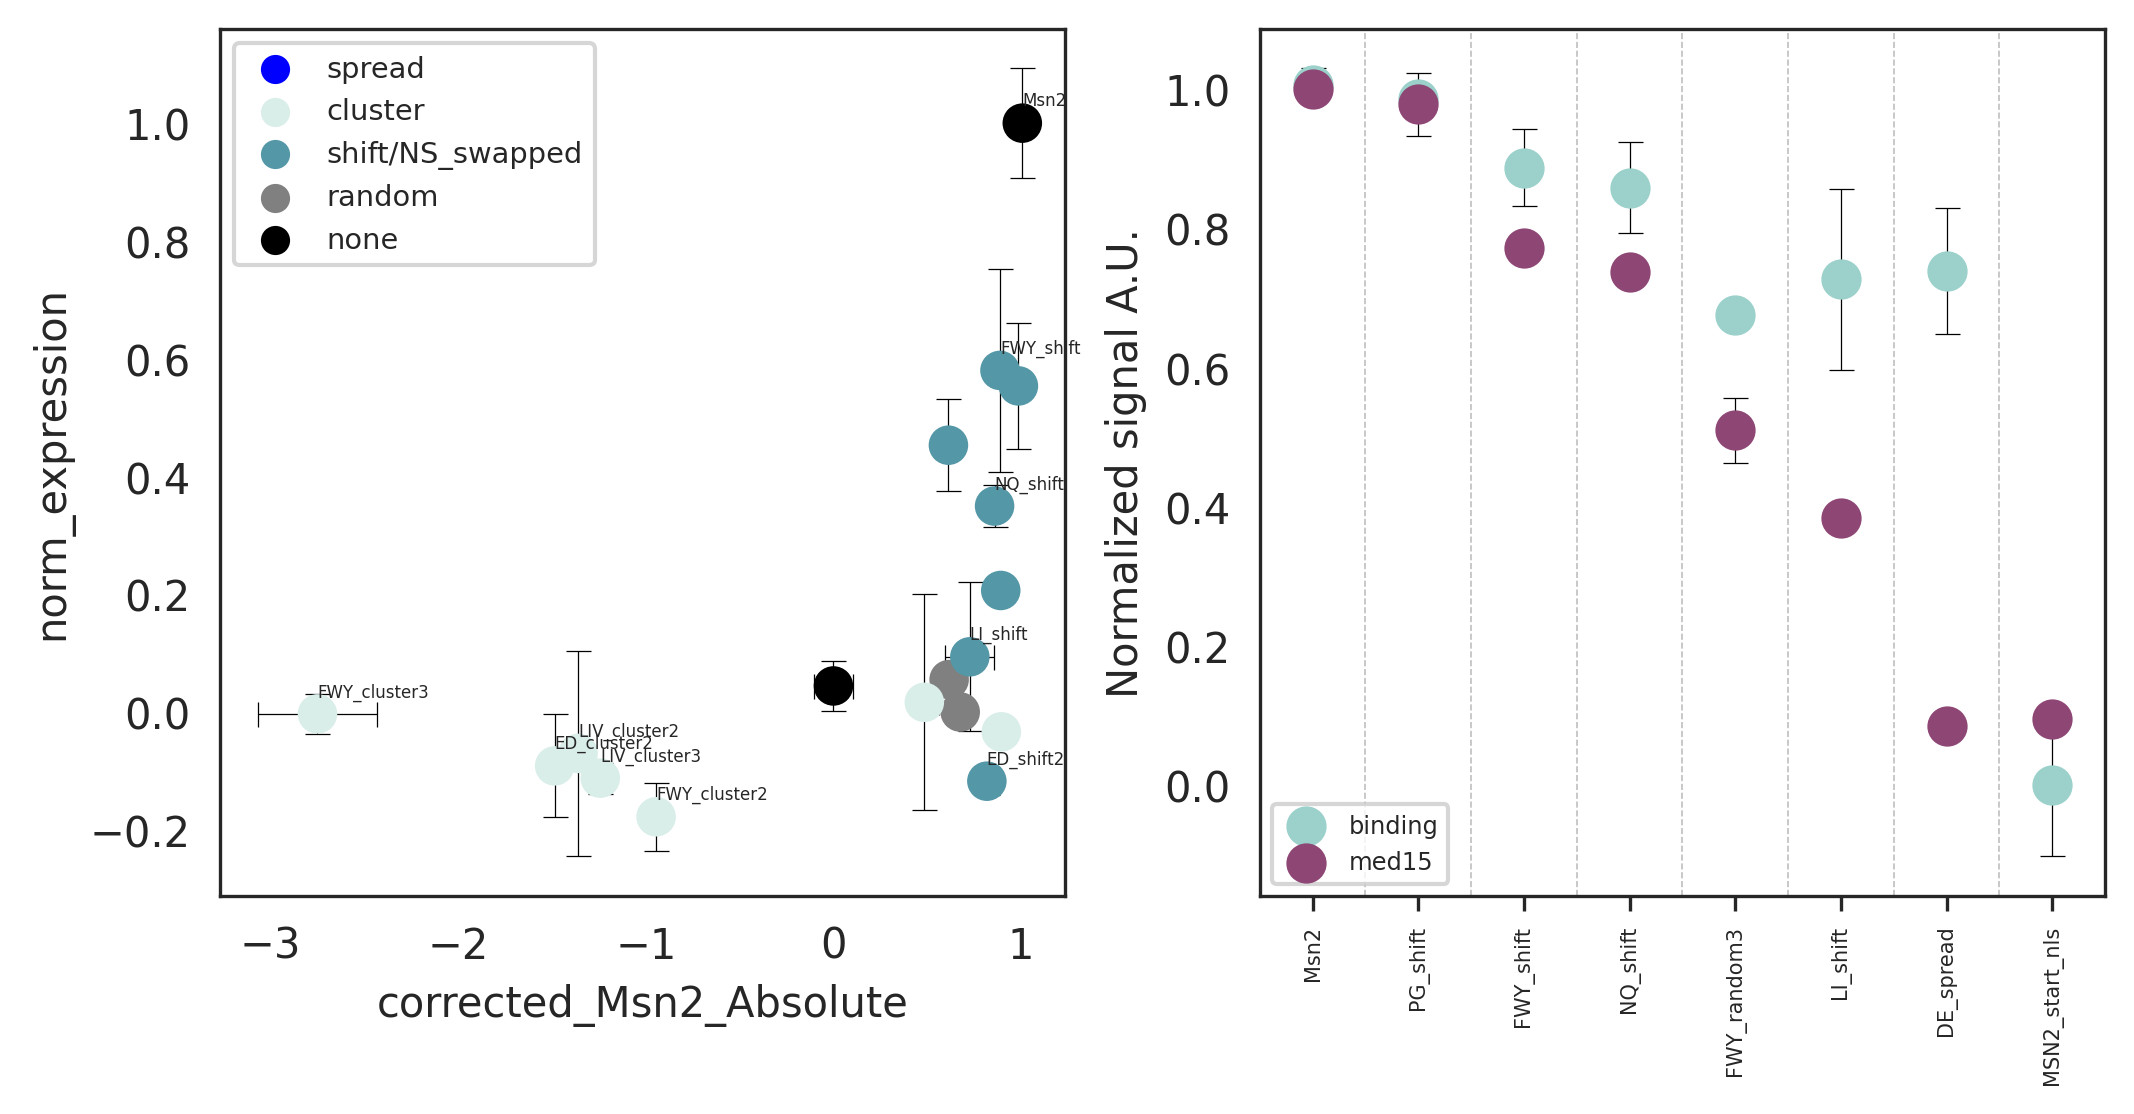

In [240]:
fig, axes = plt.subplots(1,2, figsize=(7,3.6), dpi=150, constrained_layout=True, width_ratios=[1,1], sharey=False)
ann_s = 4
dot_s = 90

    
ax = axes[0]
s = sns.scatterplot(data=dat,x='corrected_Msn2_Absolute', y='norm_expression', hue='subgroups',
                s=dot_s, ax=ax, palette=['blue', '#d9eee9', '#5497a6', '#808080', 'k'], zorder=20, linewidth=0)
ax.legend(fontsize="x-small")
errordat = dat.loc[:, ['corrected_Msn2_Absolute', 'norm_expression']].dropna()
ax.errorbar(errordat.corrected_Msn2_Absolute, errordat.norm_expression,
            e_model_sem.loc[errordat.index].squeeze().values,
            b_model_sem.loc[errordat.index].squeeze().values,
            fmt='None', capsize=3, c='k', linewidth=.3, capthick=.3)

annot = ['Msn2', 'NQ_shift', 'ED_shift2', 'LI_shift', 'FWY_shift', 'ED_cluster2', 'LIV_cluster2', 'LIV_cluster3', 'FWY_cluster2', 'FWY_cluster3']
for i in annot:
    ax.annotate(i, (dat.corrected_Msn2_Absolute.loc[i], dat.norm_expression.loc[i]+.03), size=ann_s, zorder=20)

ax = axes[1]
med_dat = dat.loc[:, ['corrected_Msn2_Absolute', 'norm_med15']].dropna().sort_values(by='norm_med15', ascending=False).iloc[[0,1,2,3,4,5,7,6]]

ax.scatter(med_dat.index, med_dat.corrected_Msn2_Absolute, label='binding', zorder=20, s=dot_s-15, c='#9bd1ca')
ax.scatter(med_dat.index, med_dat.norm_med15, label='med15', zorder=20, s=dot_s-15, c='#8e4775')
ax.legend(loc='lower left', fontsize='xx-small')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, size=5)
ax.errorbar(med_dat.index, med_dat.corrected_Msn2_Absolute, b_model_sem.loc[med_dat.index].squeeze().values,
            fmt='None', capsize=3, c='k', linewidth=.3, capthick=.3, )
ax.errorbar(med_dat.index, med_dat.norm_med15, m_model_sem.loc[med_dat.index].squeeze().values,
            fmt='None', capsize=3, c='k', linewidth=.3, capthick=.3, )
ax.tick_params(top=False,
               bottom=True,
               left=False,
               right=False,
               labelleft=True,
               labelbottom=True)
for i in np.arange(0.5, 8, 1):
    ax.axvline(i, c='gray', linewidth=.4, alpha=0.5, linestyle='--')
ax.set_xlim([-0.5, 7.5])
ax.set_ylabel('Normalized signal A.U.')

fig.savefig('figures/Main/fig4/comp_preserve.pdf')


## Fig 4E+F

In [365]:
changing = list(all_table.query("Group=='changing' or Group=='control'").index) + ['90_D_charged','90_E_charged', '90_chargedaa_to_A',
                                                                                     '90_chargedaa_to_F','90_chargedaa_to_N',
                                                                                     '90_chargedaa_to_random_2','90_chargedaa_to_random_3',]


not_needed = ['Msn2_dGal11']
problematic = ['G_is_placed_next_to_N', 'G_P_deletion']
dat = all_table.loc[changing, ['Group', 'Paddle_pred_sum',]].drop(not_needed+problematic).copy()
expression_overlap = set(average.columns).intersection(dat.index)
median_overlap = set(med.columns).intersection(dat.index)


dat.loc[:, 'corrected_Msn2_Absolute'] = b_model_mean.loc[dat.index]
dat = pd.concat([dat, e_model_mean.loc[expression_overlap]], axis=1)

dat = pd.concat([dat, m_model_mean.loc[median_overlap]], axis=1)
dat.columns = ['Group', 'Paddle_pred_sum', 'corrected_Msn2_Absolute', 'norm_expression', 'norm_med15']
dat.loc[:, 'subgroups'] = list(map(subgroup_def, dat.index))

# dat = dat.drop(not_needed+problematic)
dat = dat.rename({'MSN2WT':'Msn2'})
dat.loc['Msn2'] = ['preserving', 2335.6523, 1.0064712788282884, 1, 1, 'none']

/tmp/ipykernel_25675/1992909473.py:14: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  dat = pd.concat([dat, e_model_mean.loc[expression_overlap]], axis=1)
/tmp/ipykernel_25675/1992909473.py:16: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  dat = pd.concat([dat, m_model_mean.loc[median_overlap]], axis=1)


/tmp/ipykernel_25675/494548479.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, size=5)


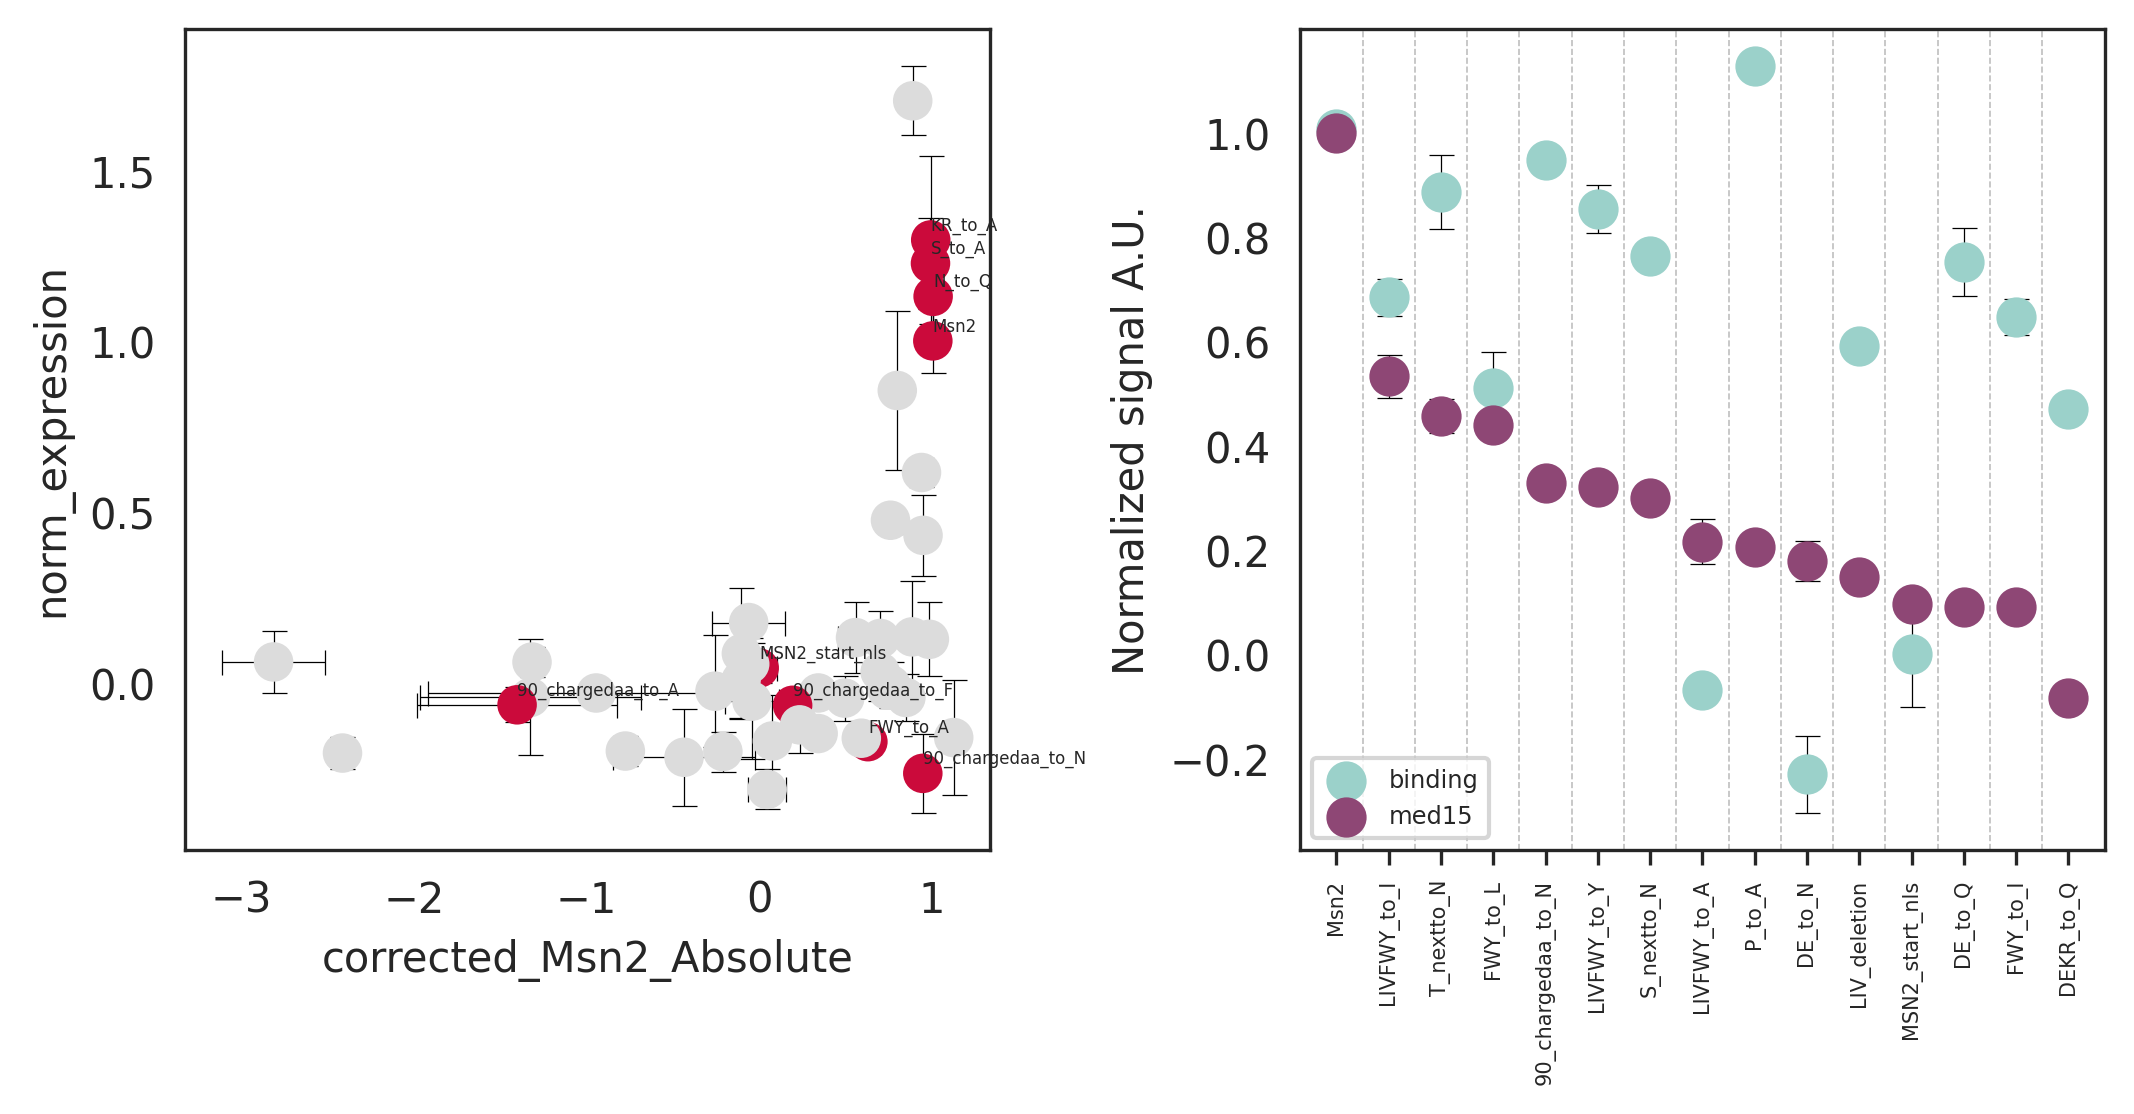

In [242]:
fig, axes = plt.subplots(1,2, figsize=(7,3.6), dpi=150, constrained_layout=True, width_ratios=[1,1], sharey=False)
ann_s = 4
dot_s = 90
annot = ['Msn2', '90_chargedaa_to_A', '90_chargedaa_to_N', '90_chargedaa_to_F', 'FWY_to_A', 'N_to_Q', 'S_to_A', 'KR_to_A', 'MSN2_start_nls']

to_annot = lambda x:'to' if x in annot else 'not'

dat.loc[:, 'subgroups'] = list(map(to_annot, dat.index))

ax = axes[0]
s = sns.scatterplot(data=dat,x='corrected_Msn2_Absolute', y='norm_expression', hue='subgroups', palette=["gainsboro", "#cb0a3b"],
                s=dot_s, ax=ax,  zorder=20, linewidth=0)

ax.legend(fontsize="x-small")
errordat = dat.loc[:, ['corrected_Msn2_Absolute', 'norm_expression']].dropna()
ax.errorbar(errordat.corrected_Msn2_Absolute, errordat.norm_expression,
            e_model_sem.loc[errordat.index].squeeze().values,
            b_model_sem.loc[errordat.index].squeeze().values,
            fmt='None', capsize=3, c='k', linewidth=.3, capthick=.3)

          
ax.legend_.remove()
for i in annot:
    ax.annotate(i, (dat.corrected_Msn2_Absolute.loc[i], dat.norm_expression.loc[i]+.03), size=ann_s, zorder=20)

ax = axes[1]
med_dat = dat.loc[:, ['corrected_Msn2_Absolute', 'norm_med15']].dropna().sort_values(by='norm_med15', ascending=False)

ax.scatter(med_dat.index, med_dat.corrected_Msn2_Absolute, label='binding', zorder=20, s=dot_s-15, c='#9bd1ca')
ax.scatter(med_dat.index, med_dat.norm_med15, label='med15', zorder=20, s=dot_s-15, c='#8e4775')
ax.legend(loc='lower left', fontsize='xx-small')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, size=5)
ax.errorbar(med_dat.index, med_dat.corrected_Msn2_Absolute, b_model_sem.loc[med_dat.index].squeeze().values,
            fmt='None', capsize=3, c='k', linewidth=.3, capthick=.3, )
ax.errorbar(med_dat.index, med_dat.norm_med15, m_model_sem.loc[med_dat.index].squeeze().values,
            fmt='None', capsize=3, c='k', linewidth=.3, capthick=.3, )
ax.tick_params(top=False,
               bottom=True,
               left=False,
               right=False,
               labelleft=True,
               labelbottom=True)
for i in np.arange(0.5, 14, 1):
    ax.axvline(i, c='gray', linewidth=.4, alpha=0.5, linestyle='--')
ax.set_ylabel('Normalized signal A.U.')
fig.savefig('figures/Main/fig4/comp_changing.pdf')


## Fig. 4B

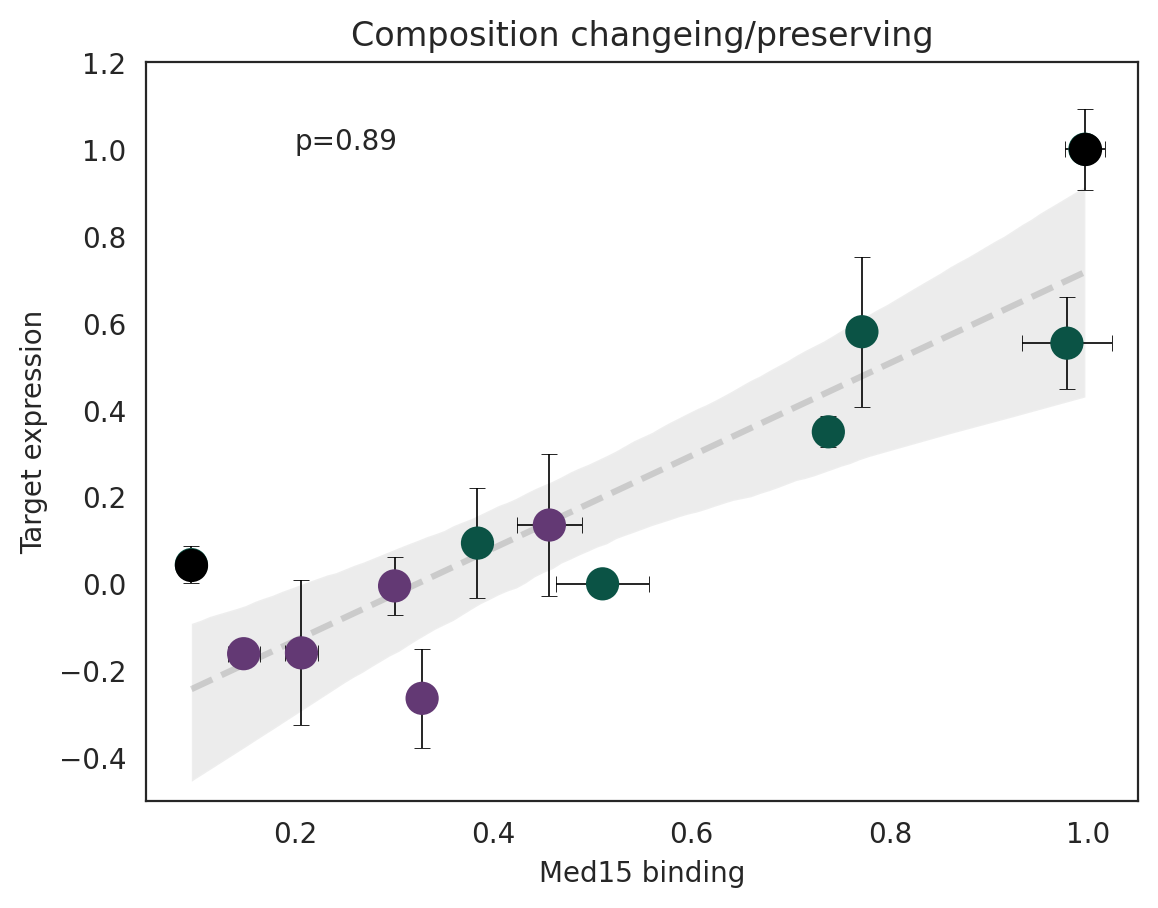

In [425]:
alls = ['DE_spread', 'ED_cluster2', 'ED_shift2', 'FWY_cluster2', 'FWY_cluster3',
       'FWY_random3', 'FWY_shift', 'LIV_cluster2', 'LIV_cluster3',
       'LIV_random1', 'LI_shift', 'Left_positive_right_negative', 'Msn2',
       'MSN2_start_nls', 'NQ_shift', 'NS_swapped', 'PG_shift', 'S_shift',
       'charged_random_cluster_2','A_nextto_N', 'DEKR_to_Q', 'DE_to_A', 'DE_to_N', 'DE_to_Q',
       'D_nextto_N', 'ED_deletion', 'ED_random1', 'ED_random2', 'ED_random3',
       'E_nextto_N', 'FWY_deletion', 'FWY_to_A', 'FWY_to_I', 'FWY_to_L',
       'G_to_A', 'KR_to_A', 'LIV_deletion', 'L_to_A', 'MSN2WT',
       'NQ_deletion', 'NQ_to_A', 'N_to_D', 'N_to_E', 'N_to_G', 'N_to_H',
       'N_to_Q', 'N_to_R', 'N_to_S', 'N_to_T', 'N_to_Y',
       'P_is_placed_next_to_N', 'P_to_A', 'Q_nextto_N', 'R_nextto_N',
       'ST_deletion', 'S_nextto_N', 'S_to_A', 'T_nextto_N', 'Y_nextto_N',
       'raax2', 'raax4', 'randomaa', 'LIVFWY_to_A', 'LIVFWY_to_I',
       'LIVFWY_to_Y', '90_D_charged', '90_E_charged', '90_chargedaa_to_A',
       '90_chargedaa_to_F', '90_chargedaa_to_N', '90_chargedaa_to_random_2',
       '90_chargedaa_to_random_3']

all_d_normed = pd.concat([b_model_mean, e_model_mean, m_model_mean, b_model_sem, e_model_sem, m_model_sem], axis=1).loc[alls]
all_d_normed.columns = ['b', 'e', 'm', 'bsem', 'esem', 'msem']
all_d_normed.loc[:, 'colors'] = '#633974'

all_d_normed.loc[['DE_spread', 'ED_cluster2', 'ED_shift2', 'FWY_cluster2', 'FWY_cluster3',
       'FWY_random3', 'FWY_shift', 'LIV_cluster2', 'LIV_cluster3',
       'LIV_random1', 'LI_shift', 'Left_positive_right_negative', 'Msn2',
       'MSN2_start_nls', 'NQ_shift', 'NS_swapped', 'PG_shift', 'S_shift',
       'charged_random_cluster_2','A_nextto_N', 'DEKR_to_Q', 'DE_to_A', 'DE_to_N', 'DE_to_Q',
       'D_nextto_N', 'ED_deletion', 'ED_random1', 'ED_random2', 'ED_random3',
       'E_nextto_N'], 'colors'] = ['#0B5345']*30

fig, ax = plt.subplots(1)

sns.regplot(data=all_d_normed,x='m', y='e', ax=ax, line_kws={'linestyle':'--', 'color':'gray', 'alpha':0.3})
ax.errorbar(all_d_normed.m, all_d_normed.e, all_d_normed.esem, all_d_normed.msem, fmt='None', capsize=3, c='k', linewidth=.6, capthick=.3)
ax.scatter(all_d_normed.m, all_d_normed.e, c=all_d_normed.colors, s=120, zorder=20)
ax.scatter(all_d_normed.m.loc[['Msn2', 'MSN2_start_nls']], all_d_normed.e.loc[['Msn2', 'MSN2_start_nls']], c='k', s=120, zorder=20)

ax.set_xlim([0.05,1.05])
ax.set_ylim([-.5, 1.2])

# for i in all_d_normed.index:
#     ax.annotate(i, (all_d_normed.m[i], all_d_normed.e[i]))
ax.text(.2,1, 'p=0.89')

ax.set_xlabel('Med15 binding')
ax.set_ylabel('Target expression')

ax.set_title('Composition changeing/preserving')

fig.savefig('figures/Supp/med_vs_exp.pdf')


# Figure 5

In [433]:
order = ['Msn2','Msn2_sCerm4T',  'Msn2_sMik_m2_Tail', 'Msn2_sKud_m2_Tail', 'Msn2_sKud_m4_Tail', 'Msn2_sBay_m2_Tail', 'Msn2_sBay_m4_Tail',
         'Msn2_sCas_m2_Tail', 'Msn2_sCas_m4_Tail','Msn2_cGla_m2_Tail', 'Msn2_cGla_m4_Tail', 'Msn2_kLac_m_Tail','Msn2_lWal_m_Tail', 'Msn2_sKlu_m_Tail']
dat = all_table.query("Group=='evo'|Group=='control'").drop(['MSN2_start_nls', 'Msn2_dGal11'])
dat = dat.loc[order]
m_model_sem = m_model_sem.rename({'Msn2_kWal_m_Tail':'Msn2_lWal_m_Tail'})
m_model_mean = m_model_mean.rename({'Msn2_kWal_m_Tail':'Msn2_lWal_m_Tail'})

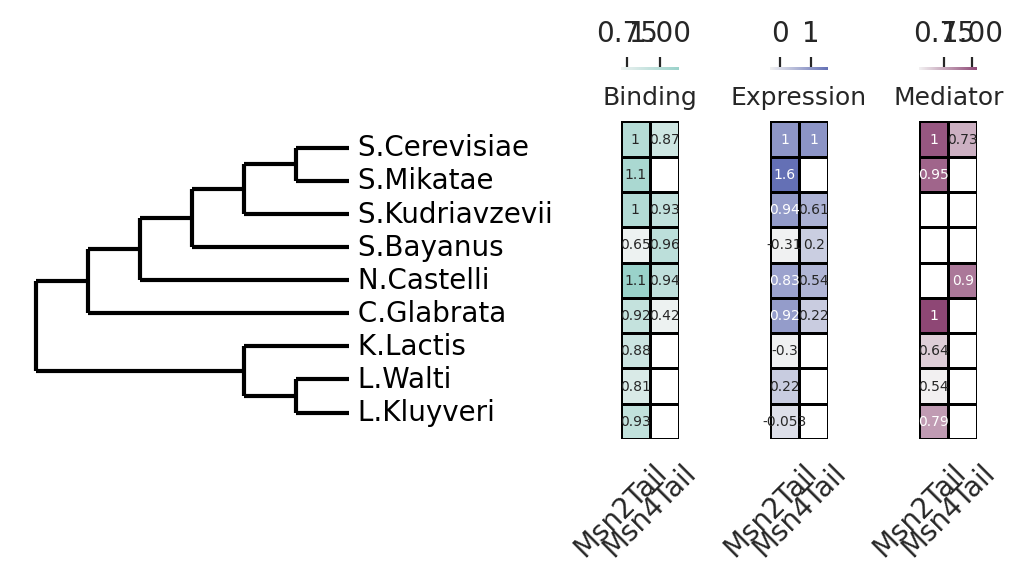

In [437]:
evos = ['S.cerevisiae', 'S.Mikatae', 'S.kudriavzevii', 'S.bayanus', 'N.castelli', 'C.glabrata', 'K.Lactis', 'L.walti', 'L.kluyveri']
ecmap = sns.color_palette("light:#6470b5", as_cmap=True)
bcmap = sns.color_palette("light:#9ad2ca", as_cmap=True)
mcmap = sns.color_palette("light:#8e4775", as_cmap=True)
treedata = "((((((S.Cerevisiae, S.Mikatae),( S.Kudriavzevii)), ((S.Bayanus))), (((N.Castelli)))), ((((C.Glabrata))))), (((((K.Lactis),(L.Walti, L.Kluyveri))))))"
handle = StringIO(treedata)
tree = Phylo.read(handle, "newick")


fig, axes = plt.subplots(1,4,figsize=(5,2.8), constrained_layout=True, width_ratios=[7,1,1,1])
ax = axes[0]
Phylo.draw(tree, do_show=False, axes=ax,)
sns.despine(ax=ax, top=True, bottom=True, left=True, right=True)
ax.set_xticklabels('')
ax.set_yticklabels('')
ax.set_ylabel('')
ax.set_xlabel('')

ax=axes[1]
evo_bind = pd.DataFrame(b_model_mean_sag.loc[dat.index])
evo_bind.loc['Msn2_sMik_m4_Tail'] = math.nan
evo_bind.loc['Msn2_kLac_m_Tail_dummy'] = math.nan
evo_bind.loc['Msn2_lWal_m_Tail_dummy'] = math.nan
evo_bind.loc['Msn2_sKlu_m_Tail_dummy'] = math.nan

evo_bind = evo_bind.loc[['Msn2', 'Msn2_sCerm4T', 'Msn2_sMik_m2_Tail', 'Msn2_sMik_m4_Tail', 'Msn2_sKud_m2_Tail',
       'Msn2_sKud_m4_Tail', 'Msn2_sBay_m2_Tail', 'Msn2_sBay_m4_Tail',
       'Msn2_sCas_m2_Tail', 'Msn2_sCas_m4_Tail', 'Msn2_cGla_m2_Tail',
       'Msn2_cGla_m4_Tail', 'Msn2_kLac_m_Tail','Msn2_kLac_m_Tail_dummy',
                         'Msn2_lWal_m_Tail','Msn2_lWal_m_Tail_dummy',
       'Msn2_sKlu_m_Tail',

'Msn2_sKlu_m_Tail_dummy']]

evo_bind = pd.DataFrame(evo_bind.values.reshape(-1,2))

sns.heatmap(evo_bind, ax=ax, cmap=bcmap, cbar_kws=dict(location='top'), linecolor='k', linewidths=.5, vmin=0.7, annot=True, annot_kws={'size':5})
ax.set_xlabel('')
ax.set_xticks([0,1], ['Msn2Tail', 'Msn4Tail'], rotation=45)
ax.set_yticklabels('')
ax.set_title('Binding', size=9)

ax=axes[2]
evo_exp = e_model_mean.loc[dat.index]
evo_exp.loc['Msn2_sMik_m4_Tail'] = math.nan
evo_exp.loc['Msn2_kLac_m_Tail_dummy'] = math.nan
evo_exp.loc['Msn2_lWal_m_Tail_dummy'] = math.nan
evo_exp.loc['Msn2_sKlu_m_Tail_dummy'] = math.nan

evo_exp = evo_exp.loc[['Msn2', 'Msn2_sCerm4T', 'Msn2_sMik_m2_Tail', 'Msn2_sMik_m4_Tail', 'Msn2_sKud_m2_Tail',
       'Msn2_sKud_m4_Tail', 'Msn2_sBay_m2_Tail', 'Msn2_sBay_m4_Tail',
       'Msn2_sCas_m2_Tail', 'Msn2_sCas_m4_Tail', 'Msn2_cGla_m2_Tail',
       'Msn2_cGla_m4_Tail', 'Msn2_kLac_m_Tail','Msn2_kLac_m_Tail_dummy',
                         'Msn2_lWal_m_Tail','Msn2_lWal_m_Tail_dummy',
       'Msn2_sKlu_m_Tail',

'Msn2_sKlu_m_Tail_dummy']]

evo_exp = pd.DataFrame(evo_exp.values.reshape(-1,2))
sns.heatmap(evo_exp, ax=ax, cmap=ecmap, cbar_kws=dict(location='top'), linecolor='k', linewidths=.5, annot=True, annot_kws={'size':5})
ax.set_xlabel('')
ax.set_xticks([0,1], ['Msn2Tail', 'Msn4Tail'], rotation=45)
ax.set_yticklabels('')
ax.set_title('Expression', size=9)

ax=axes[3]
med_drop = ['Msn2_sKud_m2_Tail', 'Msn2_sKud_m4_Tail', 'Msn2_sBay_m2_Tail', 'Msn2_sBay_m4_Tail', 'Msn2_sCas_m2_Tail', 'Msn2_cGla_m4_Tail']
evo_med = m_model_mean.loc[pd.Index(order).drop(med_drop)]
evo_med.loc['Msn2_sKud_m2_Tail'] = math.nan
evo_med.loc['Msn2_sKud_m4_Tail'] = math.nan
evo_med.loc['Msn2_sBay_m2_Tail'] = math.nan
evo_med.loc['Msn2_sBay_m4_Tail'] = math.nan
evo_med.loc['Msn2_sCas_m2_Tail'] = math.nan
evo_med.loc['Msn2_cGla_m4_Tail'] = math.nan
evo_med.loc['Msn2_sMik_m4_Tail'] = math.nan
evo_med.loc['Msn2_kLac_m_Tail_dummy'] = math.nan
evo_med.loc['Msn2_lWal_m_Tail_dummy'] = math.nan
evo_med.loc['Msn2_sKlu_m_Tail_dummy'] = math.nan
evo_med = evo_med.loc[['Msn2', 'Msn2_sCerm4T', 'Msn2_sMik_m2_Tail', 'Msn2_sMik_m4_Tail', 'Msn2_sKud_m2_Tail',
       'Msn2_sKud_m4_Tail', 'Msn2_sBay_m2_Tail', 'Msn2_sBay_m4_Tail',
       'Msn2_sCas_m2_Tail', 'Msn2_sCas_m4_Tail', 'Msn2_cGla_m2_Tail',
       'Msn2_cGla_m4_Tail', 'Msn2_kLac_m_Tail','Msn2_kLac_m_Tail_dummy',
                         'Msn2_lWal_m_Tail','Msn2_lWal_m_Tail_dummy',
       'Msn2_sKlu_m_Tail',

'Msn2_sKlu_m_Tail_dummy']]

evo_med = pd.DataFrame(evo_med.values.reshape(-1,2))
sns.heatmap(evo_med, ax=ax, cmap=mcmap, cbar_kws=dict(location='top'), linecolor='k', linewidths=.5, annot=True, annot_kws={'size':5})
ax.set_xlabel('')
ax.set_xticks([0,1], ['Msn2Tail', 'Msn4Tail'], rotation=45)
ax.set_yticklabels('')
ax.set_title('Mediator', size=9)
# ax=axes[4]
# ax.axline((0,0), slope=1, c='k', linestyle='--', linewidth=.3)

# ax.scatter(evo_med.values.reshape(1,-1)[0], evo_exp.values.reshape(1,-1)[0], c='gray', s=50, zorder=20)
# needed_error = set(m_model_mean.index).intersection(order).intersection(e_model_mean.index)
# x =  m_model_mean.loc[needed_error]
# y = e_model_mean.loc[needed_error]
# ax.errorbar(x.squeeze().values, y.squeeze().values, e_model_sem.loc[needed_error].squeeze().values,
#             m_model_sem.loc[needed_error].squeeze().values, fmt='None', capsize=3, c='k', linewidth=.3, capthick=.3, zorder=20)
# for i in needed_error:
#     ax.annotate(i, (x.loc[i], y.loc[i]), size=3, zorder=20)

# ax.set_yticks([-1,0,1])
# ax.set_xlabel('Med signal')
# ax.set_ylabel('Expression signal')
fig.savefig('figures/Main/fig5/evo.pdf')
fig.show()

# Supplementary

## S2

/tmp/ipykernel_25675/2732991543.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


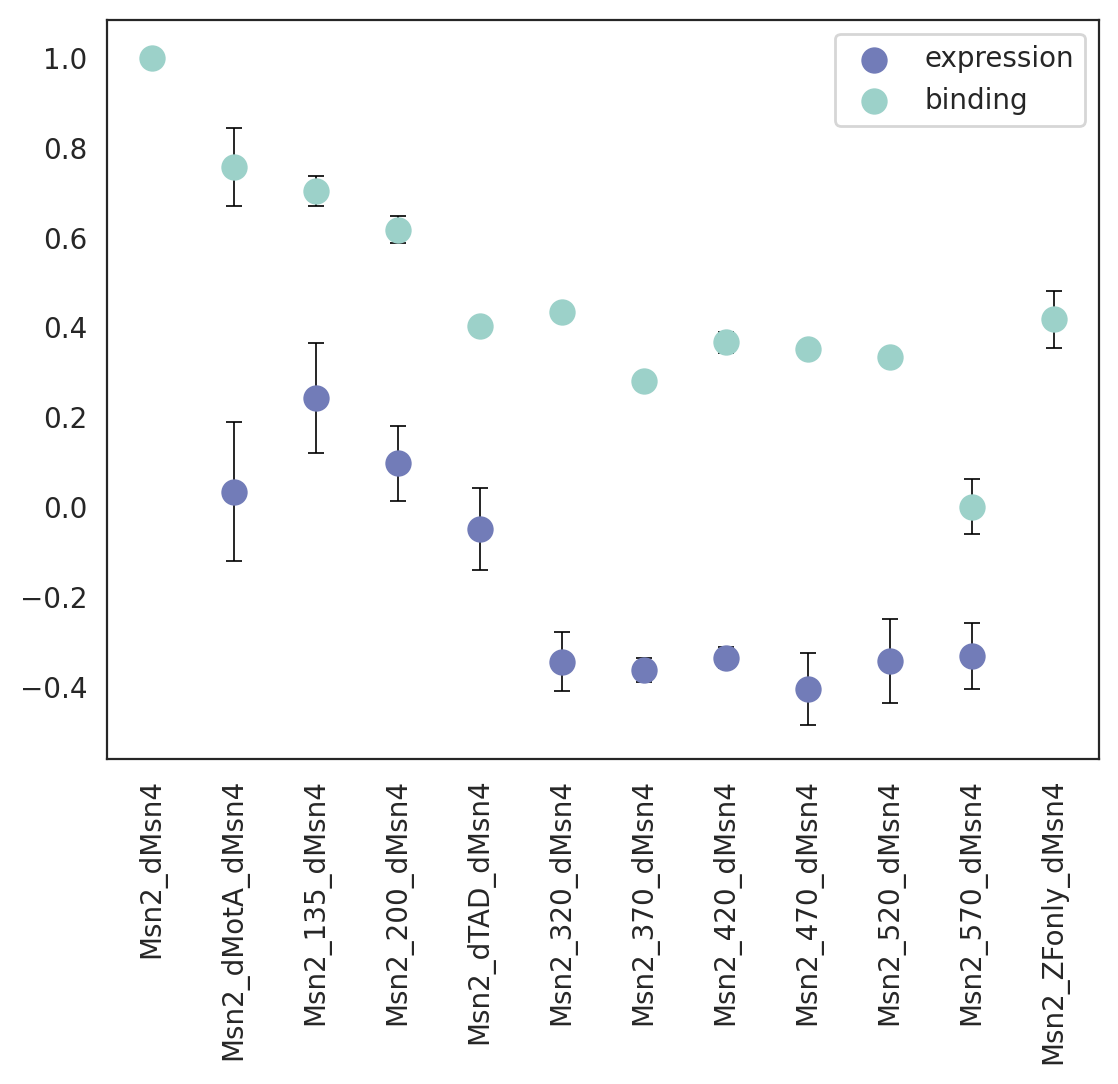

In [245]:

minmax_sp_msn4 =  lambda x : (x - b_model_repeats_sag.loc['Msn2_delMsn4_d570'].mean()) /\
(b_model_repeats_sag.loc['Msn2_dMsn4'].mean() - b_model_repeats_sag.loc['Msn2_delMsn4_d570'].mean())
size=90


msn4_sp = b_model_repeats_sag.filter(regex='Msn4', axis=0)
msn4_sp = minmax_sp_msn4(msn4_sp)
msn4_sp.index = msn4_sp.index.str.replace('del', 'd')
order = ['Msn2_dMsn4', 'Msn2_dMsn4_dMotA', 'Msn2_dMsn4_d135', 'Msn2_dMsn4_d200','Msn2_dMsn4_dTAD',
         'Msn2_dMsn4_d320', 'Msn2_dMsn4_d370', 'Msn2_dMsn4_d420', 'Msn2_dMsn4_d470', 'Msn2_dMsn4_d520',
         'Msn2_dMsn4_d570', 'Msn2_ZFonly_dMsn4']
msn4_sp = msn4_sp.reset_index().groupby('index').mean().loc[order]


trunc_dmsn4 = ['Msn2_dMotA_dMsn4', 'Msn2_135_dMsn4',  'Msn2_200_dMsn4','Msn2_dTAD_dMsn4',
        'Msn2_320_dMsn4', 'Msn2_370_dMsn4', 'Msn2_420_dMsn4', 'Msn2_470_dMsn4', 'Msn2_520_dMsn4', 'Msn2_570_dMsn4']

overlap_dmsn4 = ['Msn2_150_350_dMsn4',
'Msn2_250_450_dMsn4',
'Msn2_350_550_dMsn4',
'Msn2_450_642_dMsn4',]

msn4_exp = pd.DataFrame(e_model_mean.loc[trunc_dmsn4])
msn4_exp.loc['Msn2_dMsn4'] = math.nan
msn4_exp.loc['Msn2_ZFonly_dMsn4'] = math.nan
msn4_exp = msn4_exp.loc[['Msn2_dMsn4','Msn2_dMotA_dMsn4', 'Msn2_135_dMsn4',  'Msn2_200_dMsn4','Msn2_dTAD_dMsn4',
        'Msn2_320_dMsn4', 'Msn2_370_dMsn4', 'Msn2_420_dMsn4', 'Msn2_470_dMsn4', 'Msn2_520_dMsn4', 'Msn2_570_dMsn4', 'Msn2_ZFonly_dMsn4']]

msn4_exp_error = pd.DataFrame(e_model_sem.loc[trunc_dmsn4])
msn4_exp_error.loc['Msn2_dMsn4'] = math.nan
msn4_exp_error.loc['Msn2_ZFonly_dMsn4'] = math.nan
msn4_exp_error = msn4_exp_error.loc[['Msn2_dMsn4','Msn2_dMotA_dMsn4', 'Msn2_135_dMsn4',  'Msn2_200_dMsn4','Msn2_dTAD_dMsn4',
        'Msn2_320_dMsn4', 'Msn2_370_dMsn4', 'Msn2_420_dMsn4', 'Msn2_470_dMsn4', 'Msn2_520_dMsn4', 'Msn2_570_dMsn4', 'Msn2_ZFonly_dMsn4']]

sem_trunc_dmsn4 = ['Msn2_dMsn4', 'Msn2_delMsn4_dMotA', 'Msn2_delMsn4_d135', 'Msn2_delMsn4_d200' ,'Msn2_delMsn4_dTAD',
       'Msn2_delMsn4_d320',  'Msn2_delMsn4_d370',
       'Msn2_delMsn4_d420', 'Msn2_delMsn4_d470',
       'Msn2_delMsn4_d520', 'Msn2_delMsn4_d570', 
        'Msn2_ZFonly_dMsn4', ]

sem_overlap_dmsn4 = ['Msn2_dMsn4', 'Msn2_delMsn4_d150_350',
'Msn2_delMsn4_d250_450',
'Msn2_delMsn4_d350_550',
'Msn2_delMsn4_d450_642']

fig, ax = plt.subplots(1)

sp_error = minmax_sp_msn4(b_model_repeats_sag.filter(regex='Msn4', axis=0)).reset_index().groupby('index').sem()
sp_error.index = sp_error.index.str.replace('del', 'd')
sp_error = sp_error.loc[order]

ax.scatter(msn4_exp.index, msn4_exp, label='expression', zorder=20, linewidths=0, c='#727cb8', s=size)
ax.scatter(msn4_exp.index, msn4_sp, label='binding', zorder=20, c='#9cd1c9', linewidths=0, s=size)
ax.errorbar(msn4_exp.index, msn4_exp.transpose().values[0] ,msn4_exp_error.fillna(0).transpose().values[0], fmt='None', c='k', capsize=3, capthick=.6, elinewidth=.6)
ax.errorbar(msn4_exp.index, msn4_sp.transpose().values[0], sp_error.squeeze().values, fmt='None', c='k', capsize=3, capthick=.6, elinewidth=.6)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.legend()
fig.savefig('figures/Supp/trunc_dmsn4.pdf')

plt.show()

/tmp/ipykernel_25675/2833935341.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


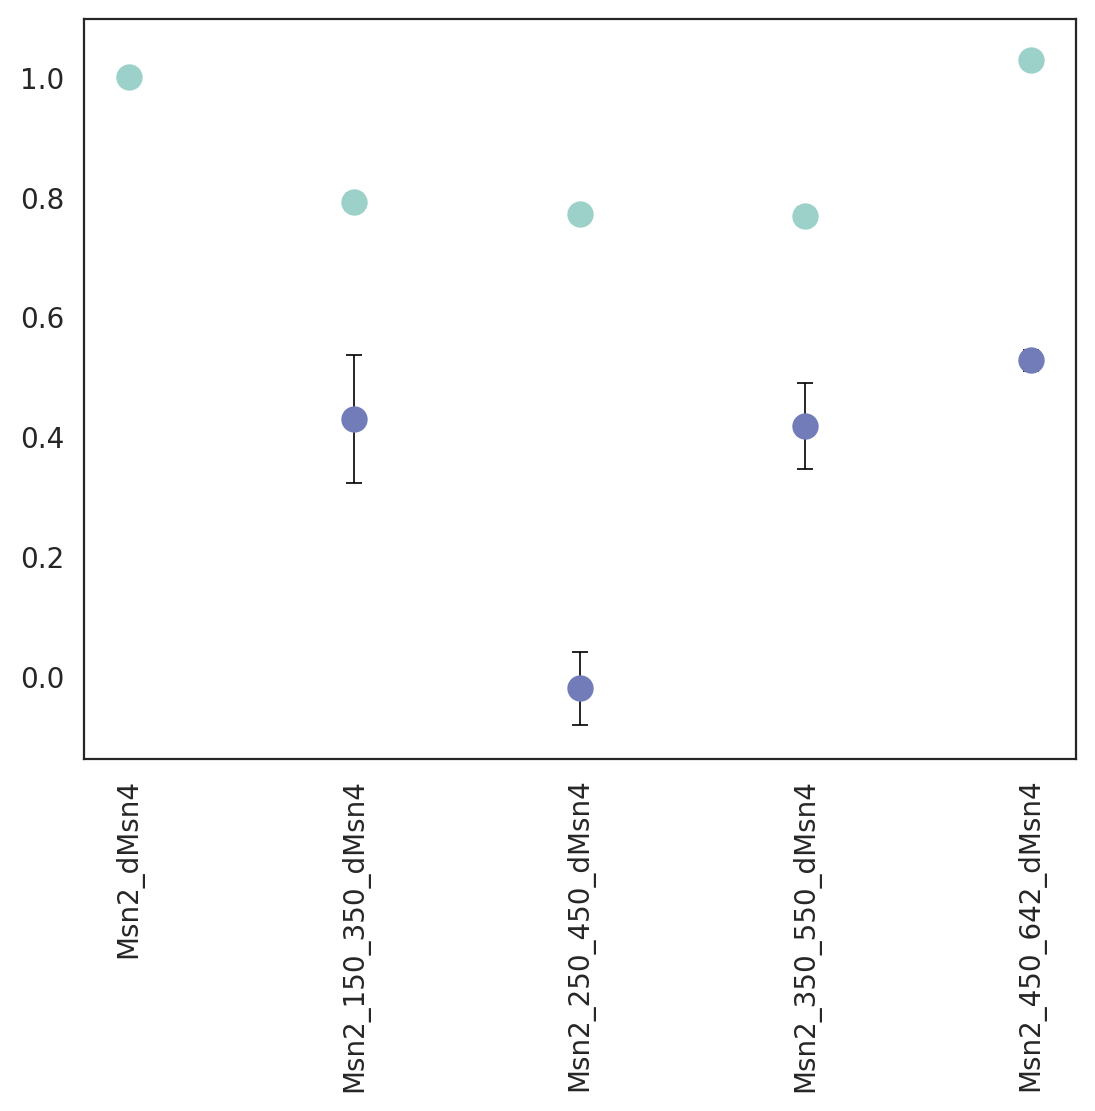

In [246]:
msn4_sp = b_model_repeats_sag.filter(regex='Msn4', axis=0)
msn4_sp = minmax_sp_msn4(msn4_sp)
msn4_sp.index = msn4_sp.index.str.replace('del', 'd')
order = ['Msn2_dMsn4', 'Msn2_dMsn4_dMotA', 'Msn2_dMsn4_d135', 'Msn2_dMsn4_d200','Msn2_dMsn4_dTAD',
         'Msn2_dMsn4_d320', 'Msn2_dMsn4_d370', 'Msn2_dMsn4_d420', 'Msn2_dMsn4_d470', 'Msn2_dMsn4_d520',
         'Msn2_dMsn4_d570', 'Msn2_ZFonly_dMsn4']
msn4_sp = msn4_sp.reset_index().groupby('index').mean().loc[['Msn2_dMsn4', 'Msn2_dMsn4_d150_350', 'Msn2_dMsn4_d250_450', 'Msn2_dMsn4_d350_550', 'Msn2_dMsn4_d450_642']]

size=90

msn4_exp = pd.DataFrame(e_model_mean.loc[overlap_dmsn4])
msn4_exp.loc['Msn2_dMsn4'] = math.nan
msn4_exp = msn4_exp.iloc[[4,0,1,2,3,]]

msn4_exp_error = pd.DataFrame(e_model_sem.loc[overlap_dmsn4])
msn4_exp_error.loc['Msn2_dMsn4'] = math.nan
msn4_exp_error = msn4_exp_error.iloc[[4,0,1,2,3,]]

fig, ax = plt.subplots(1)
ax.scatter(msn4_exp.index, msn4_exp, label='expression', zorder=20, c='#727cb8', linewidths=0, s=size)
ax.scatter(msn4_exp.index, msn4_sp, label='binding', zorder=20, c='#9cd1c9', linewidths=0, s=size)
ax.errorbar(msn4_exp.index, msn4_exp.transpose().values[0] ,msn4_exp_error.fillna(0).transpose().values[0], fmt='None', c='k', capsize=3, capthick=.6, elinewidth=.6)
ax.errorbar(msn4_exp.index, msn4_sp.transpose().values[0], b_model_sem_sag.loc[sem_overlap_dmsn4].fillna(0).transpose().values[0], fmt='None', c='k', capsize=3, capthick=.6, elinewidth=.6)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
fig.savefig('figures/Supp/overlap_dmsn4.pdf')
plt.show()


## S3

/tmp/ipykernel_25675/154333651.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(del_to, rotation=90)
/tmp/ipykernel_25675/154333651.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(del_from, rotation=90)


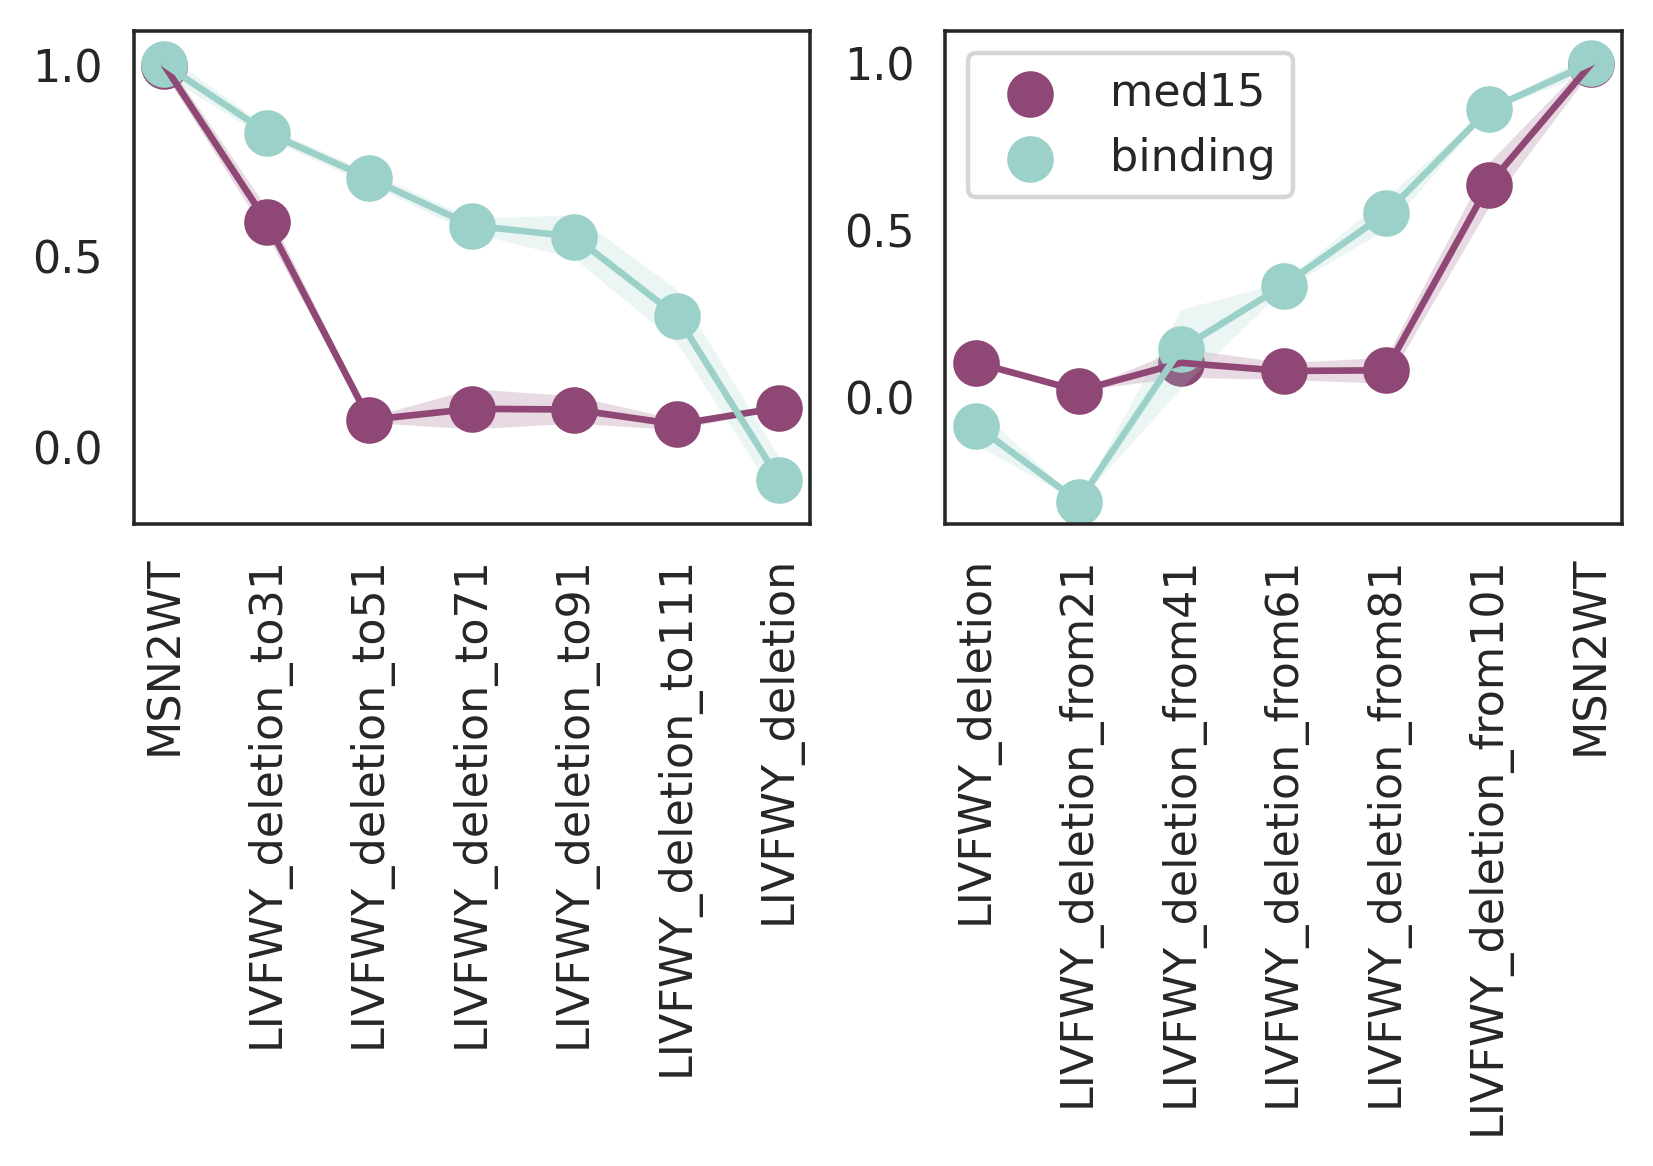

In [247]:
del_from = ['LIVFWY_deletion', 'LIVFWY_deletion_from21','LIVFWY_deletion_from41','LIVFWY_deletion_from61','LIVFWY_deletion_from81','LIVFWY_deletion_from101', 'MSN2WT', ]
del_to = ['MSN2WT', 'LIVFWY_deletion_to31', 'LIVFWY_deletion_to51',
       'LIVFWY_deletion_to71', 'LIVFWY_deletion_to91','LIVFWY_deletion_to111','LIVFWY_deletion',]

del_from_med = ['LIVFWY_deletion', 'LIVFWY_deletion_from21','LIVFWY_deletion_from41','LIVFWY_deletion_from61','LIVFWY_deletion_from81','LIVFWY_deletion_from101', 'Msn2', ]
del_to_med = ['Msn2', 'LIVFWY_deletion_to31', 'LIVFWY_deletion_to51',
       'LIVFWY_deletion_to71', 'LIVFWY_deletion_to91','LIVFWY_deletion_to111','LIVFWY_deletion',]

fig, axes = plt.subplots(1,2, figsize=(6,2), sharey=False, dpi=160)
size=90
ax=axes[0]
dat = all_table.loc[del_to, :]

ax.scatter(del_to, m_model_mean.loc[del_to_med], s=size, label='med15',color='#8f4875')
ax.plot(del_to, m_model_mean.loc[del_to_med],color='#8f4875' )
ax.fill_between(del_to, m_model_mean.loc[del_to_med].squeeze().values-m_model_sem.loc[del_to_med].squeeze().values,
                m_model_mean.loc[del_to_med].squeeze().values+m_model_sem.loc[del_to_med].squeeze().values,
                 color='#8f4875', alpha=0.2, edgecolor='k', linewidths=0)


ax.scatter(del_to, b_model_mean.loc[del_to], s=size, label='binding', c='#9cd1c9')
ax.plot(del_to, b_model_mean.loc[del_to], c='#9cd1c9' )
ax.fill_between(del_to, b_model_mean.loc[del_to].squeeze().values-b_model_sem.loc[del_to].squeeze().values,
                b_model_mean.loc[del_to].squeeze().values+b_model_sem.loc[del_to].squeeze().values,
                 color='#9cd1c9', alpha=0.2, edgecolor='k', linewidths=0)

ax.set_xticklabels(del_to, rotation=90)
ax=axes[1]
dat = all_table.loc[del_from, :]

ax.scatter(del_from, m_model_mean.loc[del_from_med], s=size, label='med15',color='#8f4875',)
ax.plot(del_from, m_model_mean.loc[del_from_med] ,color='#8f4875',)
ax.fill_between(del_from, m_model_mean.loc[del_from_med].squeeze().values-m_model_sem.loc[del_from_med].squeeze().values,
                m_model_mean.loc[del_from_med].squeeze().values+m_model_sem.loc[del_from_med].squeeze().values,
                 color='#8f4875', alpha=0.2, edgecolor='k', linewidths=0)


ax.scatter(del_from, b_model_mean.loc[del_from], s=size, label='binding', c='#9cd1c9')
ax.plot(del_from, b_model_mean.loc[del_from] , c='#9cd1c9')
ax.fill_between(del_from, b_model_mean.loc[del_from].squeeze().values-b_model_sem.loc[del_from].squeeze().values,
                b_model_mean.loc[del_from].squeeze().values+b_model_sem.loc[del_from].squeeze().values,
                  color='#9cd1c9', alpha=0.2, edgecolor='k', linewidths=0)
ax.set_xticklabels(del_from, rotation=90)
ax.legend()
fig.savefig('figures/Supp/livfwy_dl_tofrom.pdf')


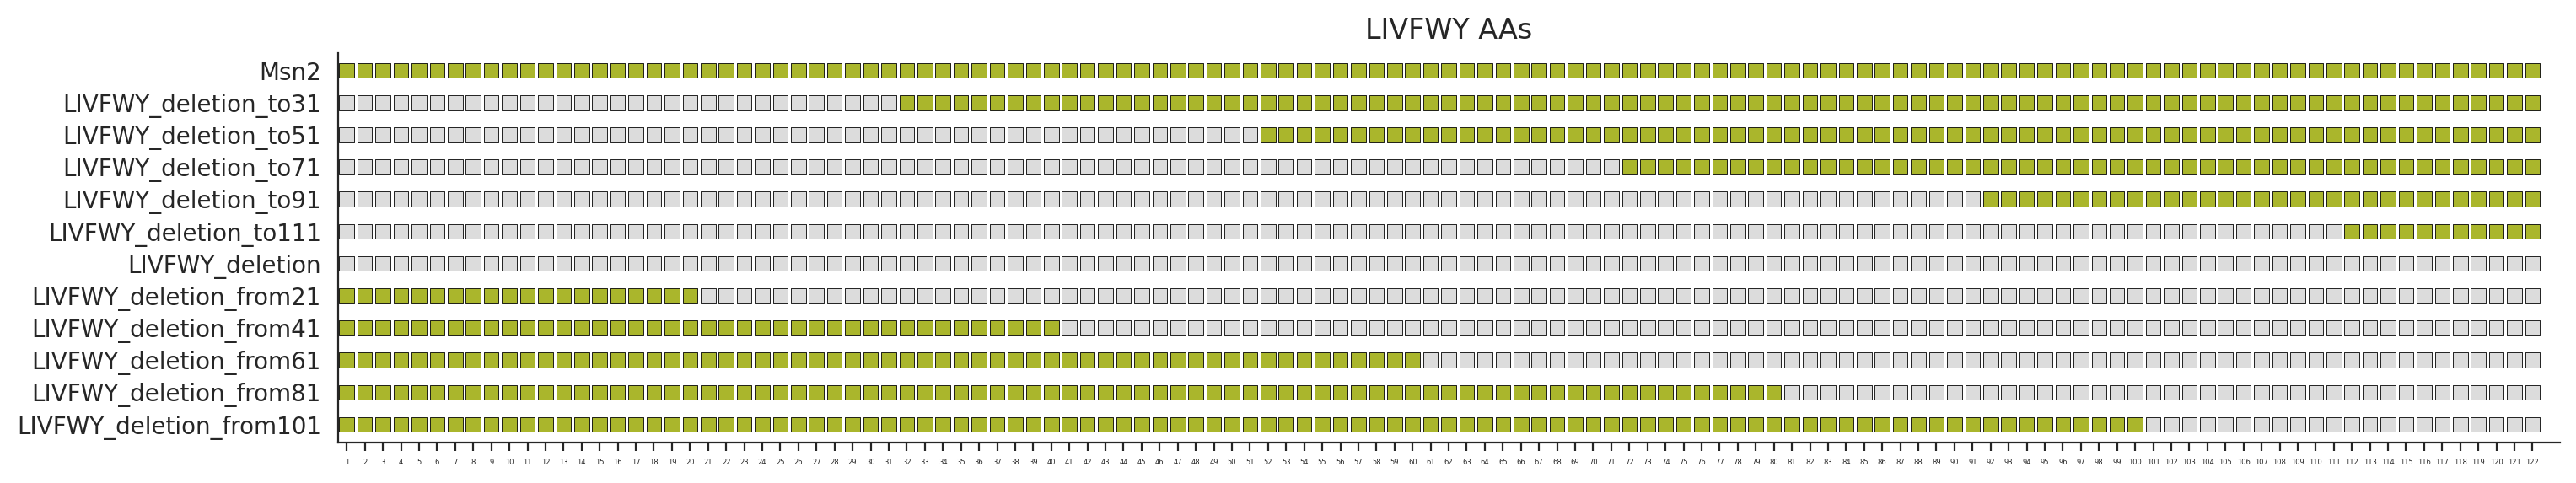

In [248]:
hydroph_seq = data_table.filter(regex='Msn2$|LIVFWY_deletion', axis=0).loc[:, 'Msn2_Amino_acid_seq_nozf'].to_dict()
hyd_fync = lambda x: True if x in 'LIVFWY' else False

dyro = dict()
for name, seq in hydroph_seq.items():
    dyro[name] = list(np.array(list(seq))[np.array(list(map(hyd_fync, seq)))])
dyro['LIVFWY_deletion'] = ['deleted'] * len(dyro['Msn2'])
dyro['LIVFWY_deletion_from101'] = dyro['LIVFWY_deletion_from101'] + ['deleted'] * 22
dyro['LIVFWY_deletion_from21'] = dyro['LIVFWY_deletion_from21'] + ['deleted'] * 102

dyro['LIVFWY_deletion_from41'] = dyro['LIVFWY_deletion_from41'] + ['deleted'] * 82
dyro['LIVFWY_deletion_from61'] = dyro['LIVFWY_deletion_from61'] + ['deleted'] * 62
dyro['LIVFWY_deletion_from81'] = dyro['LIVFWY_deletion_from81'] + ['deleted'] * 42
dyro['LIVFWY_deletion_to111'] = ['deleted'] * 111 + dyro['LIVFWY_deletion_to111'] 
dyro['LIVFWY_deletion_to31'] = ['deleted'] * 31 + dyro['LIVFWY_deletion_to31'] 
dyro['LIVFWY_deletion_to51'] = ['deleted'] * 51 + dyro['LIVFWY_deletion_to51'] 
dyro['LIVFWY_deletion_to71'] = ['deleted'] * 71 + dyro['LIVFWY_deletion_to71'] 
dyro['LIVFWY_deletion_to91'] = ['deleted'] * 91 + dyro['LIVFWY_deletion_to91'] 
seqs_df_livfwy = pd.DataFrame({i:pd.Series(k) for i, k in dyro.items()}).transpose().drop('LIVFWY_deletion_to11')

coloured = seqs_df_livfwy.applymap(lambda x: '#aab62c' if x in 'LIVFWY' else 'gainsboro')

coloured = coloured.loc[['Msn2','LIVFWY_deletion_to31', 'LIVFWY_deletion_to51', 'LIVFWY_deletion_to71',
       'LIVFWY_deletion_to91', 'LIVFWY_deletion_to111', 'LIVFWY_deletion', 'LIVFWY_deletion_from21',
       'LIVFWY_deletion_from41', 'LIVFWY_deletion_from61',
       'LIVFWY_deletion_from81', 'LIVFWY_deletion_from101',
       ]]

fig, ax = plt.subplots(1, figsize=(17,3))

i = coloured.shape[0]
while i > 0:
    ax.scatter(np.arange(coloured.shape[1]), np.zeros(coloured.shape[1])+i, 
               c=coloured.iloc[-i].values, marker='s', edgecolors='k', linewidths=.3, s=40)
    i -= 1
ax.set_yticks(range(1, coloured.shape[0]+1), coloured.index.values[::-1])
ax.set_xlim([-.5, 122.5])
ax.set_xticks(np.arange(122), np.arange(122)+1,size=3 )
sns.despine(fig)
ax.tick_params(top=False,
               bottom=True,
               left=False,
               right=False,
               labelleft=True,
               labelbottom=True)
ax.set_title('LIVFWY AAs')
fig.savefig('figures/Supp/livfwy_scheme.pdf')


## S4

/tmp/ipykernel_25675/788587538.py:8: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  x =  m_model_mean.loc[needed_error]
/tmp/ipykernel_25675/788587538.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  y = e_model_mean.loc[needed_error]
/tmp/ipykernel_25675/788587538.py:10: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  ax.errorbar(x.squeeze().values, y.squeeze().values, e_model_sem.loc[needed_error].squeeze().values,
/tmp/ipykernel_25675/788587538.py:11: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  m_model_sem.loc[needed_error].squeeze().values, fmt='None', capsize=3, c='k', linewidth=.3, capthick=.3, zorder=20)


Text(0, 0.5, 'Expression signal')

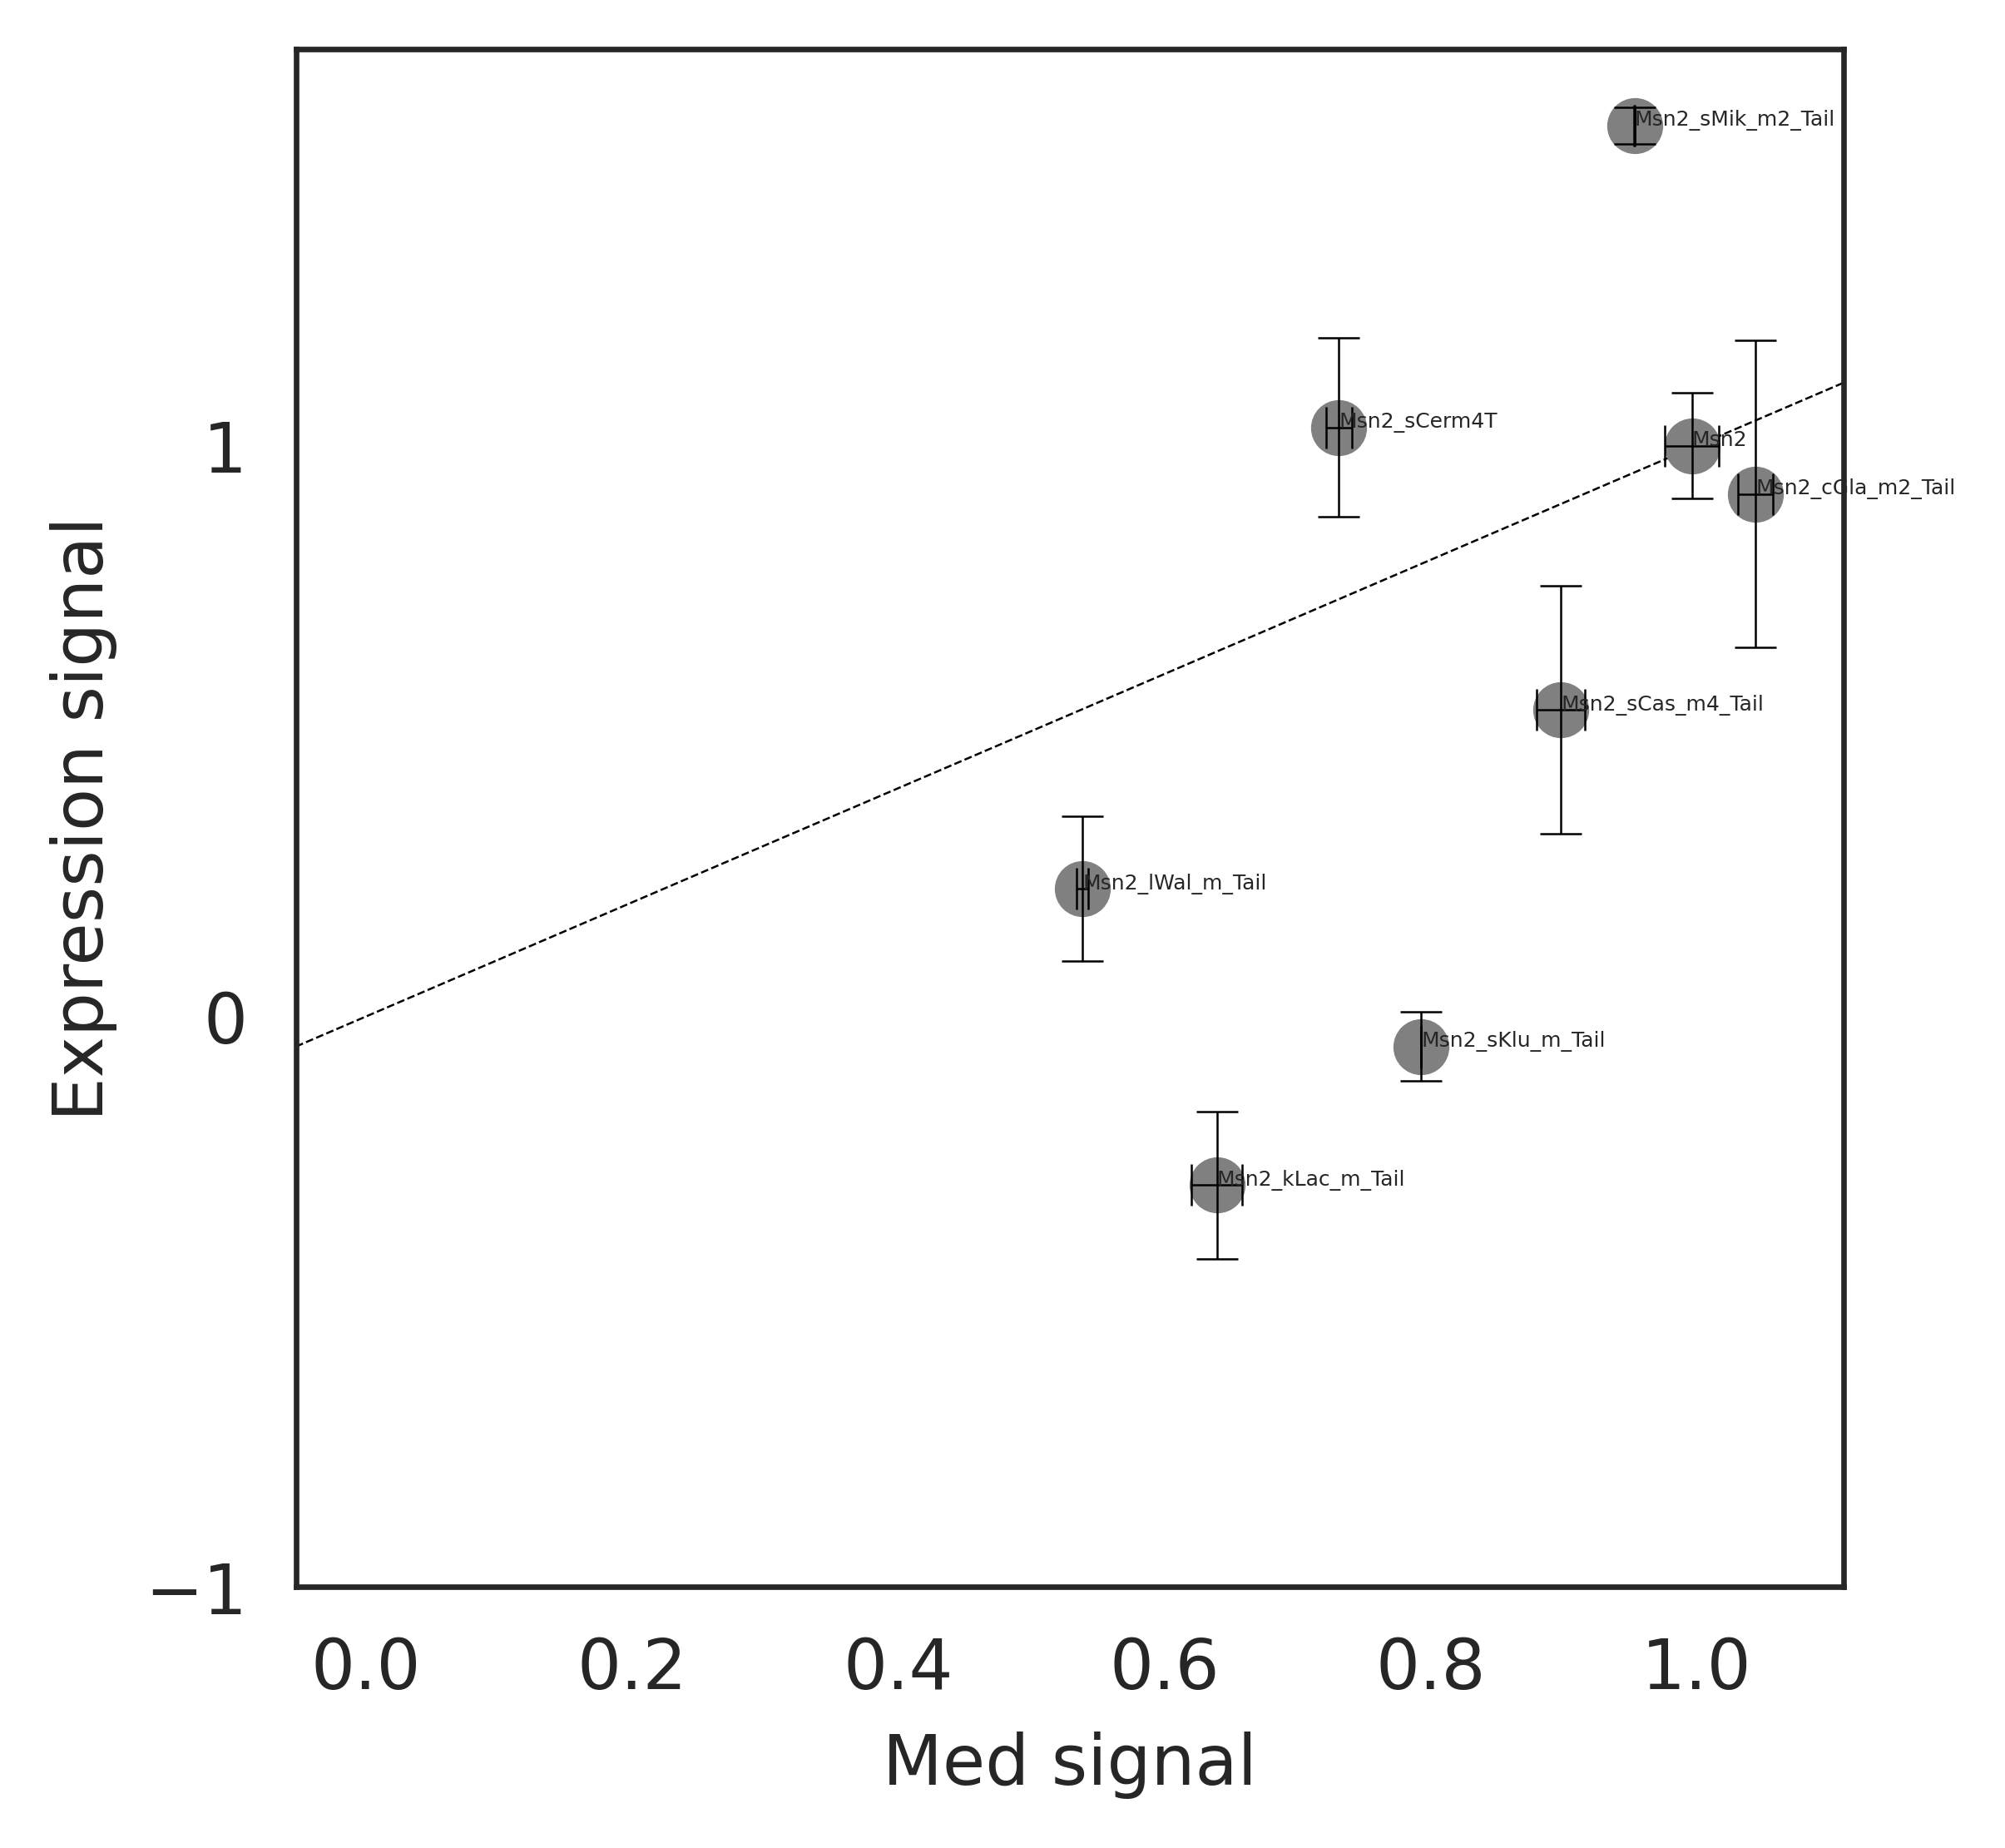

In [431]:
fig, ax = plt.subplots(1, dpi=300, figsize=(4,4))
order = ['Msn2','Msn2_sCerm4T',  'Msn2_sMik_m2_Tail', 'Msn2_sKud_m2_Tail', 'Msn2_sKud_m4_Tail', 'Msn2_sBay_m2_Tail', 'Msn2_sBay_m4_Tail',
         'Msn2_sCas_m2_Tail', 'Msn2_sCas_m4_Tail','Msn2_cGla_m2_Tail', 'Msn2_cGla_m4_Tail', 'Msn2_kLac_m_Tail','Msn2_lWal_m_Tail', 'Msn2_sKlu_m_Tail']
ax.axline((0,0), slope=1, c='k', linestyle='--', linewidth=.3)

ax.scatter(evo_med.values.reshape(1,-1)[0], evo_exp.values.reshape(1,-1)[0], c='gray', s=50, zorder=20)
needed_error = set(m_model_mean.index).intersection(order).intersection(e_model_mean.index)
x =  m_model_mean.loc[needed_error]
y = e_model_mean.loc[needed_error]
ax.errorbar(x.squeeze().values, y.squeeze().values, e_model_sem.loc[needed_error].squeeze().values,
            m_model_sem.loc[needed_error].squeeze().values, fmt='None', capsize=3, c='k', linewidth=.3, capthick=.3, zorder=20)
for i in needed_error:
    ax.annotate(i, (x.loc[i], y.loc[i]), size=3, zorder=20)

ax.set_yticks([-1,0,1])
ax.set_xlabel('Med signal')
ax.set_ylabel('Expression signal')